<center><h1>Bank Marketing: Identify Potential Cleints - Classification Modeling</h1></center>

# Introduction

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

The goal of this notebook is to use the data to develop a strong model in order to predict which people the bank should market to for their marketing campain to get people to sign up for a term deposit.

# About the data

Unfortunately, not much about the data is given besides for the below information. More information about where this data came from can be found at this website: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

## Bank client data:<br>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.

## Related with the last contact of the current campaign:
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## Other attributes:<br>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
16 - **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')

# Libraries

## Libraries for plotting and analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot
from numpy import where
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Libraries for Modeling

In [ ]:
!pip install imblearn
!pip install xgboost
!pip install lightgbm
!pip install scikit-learn
!pip install plotly
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Data Exploration

In [ ]:
# data = pd.read_csv('bank.csv', sep=';')
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
data.shape

(45211, 17)

In [ ]:
#check for any Null values
nulls = []
for i in data.columns:
    nulls.append(data[i].isnull().sum())
print(nulls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#check the column data types
types=[]
for i in data.columns:
    types.append(type(data[i][0]))
print(types)

[<class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'str'>]


In [ ]:
cat_cols = np.array(['job', 'marital', 'education', 'default', 'housing', 'loan', 
                     'contact', 'month', 'poutcome', 'y'])
for x in cat_cols:
    print("Attribute \"%s\":" % (x), data[x].unique())

Attribute "job": ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Attribute "marital": ['married' 'single' 'divorced']
Attribute "education": ['tertiary' 'secondary' 'unknown' 'primary']
Attribute "default": ['no' 'yes']
Attribute "housing": ['yes' 'no']
Attribute "loan": ['no' 'yes']
Attribute "contact": ['unknown' 'cellular' 'telephone']
Attribute "month": ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Attribute "poutcome": ['unknown' 'failure' 'other' 'success']
Attribute "y": ['no' 'yes']


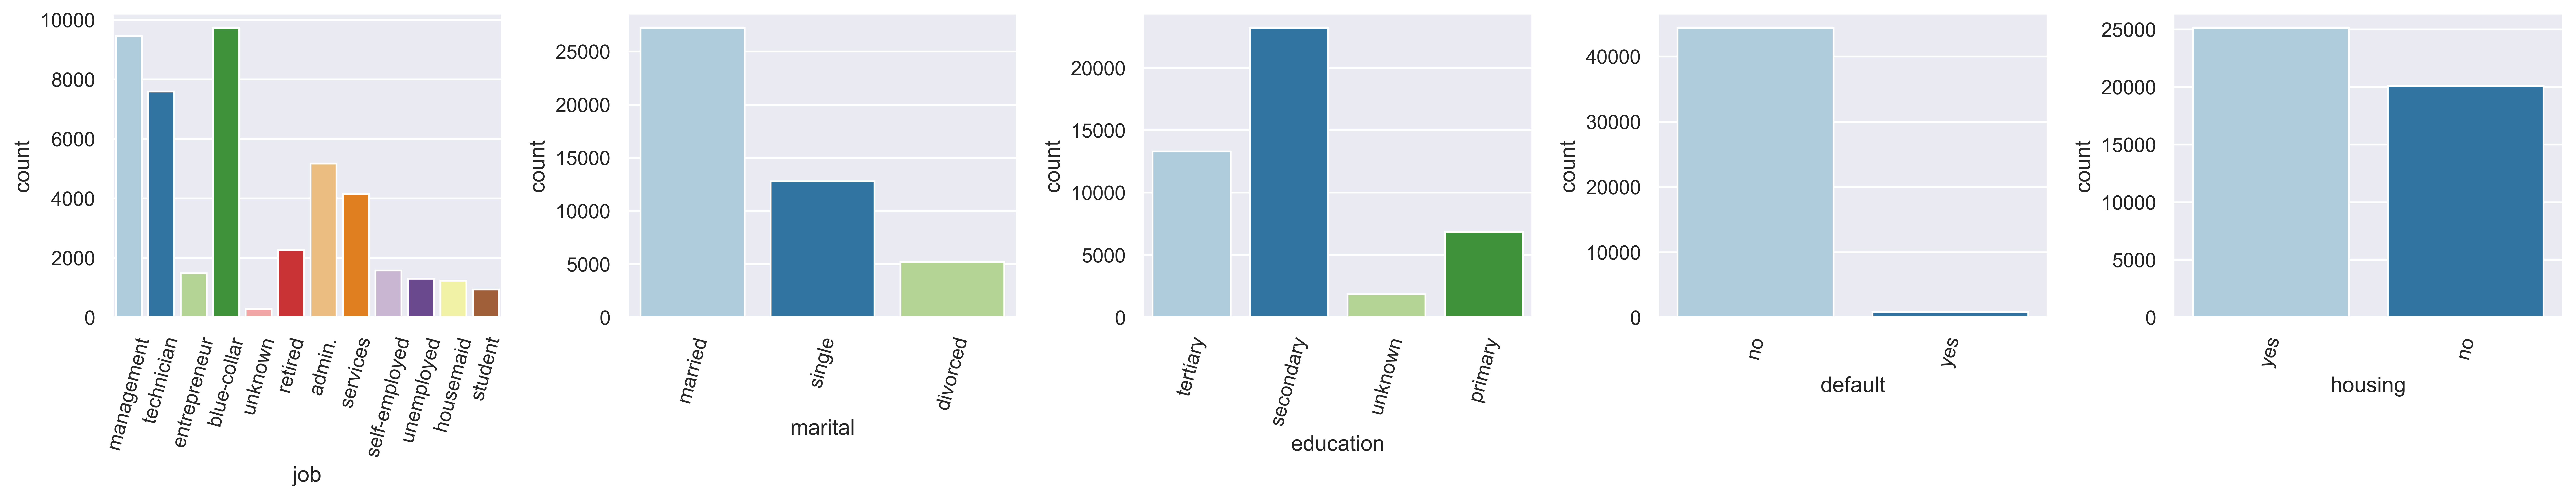

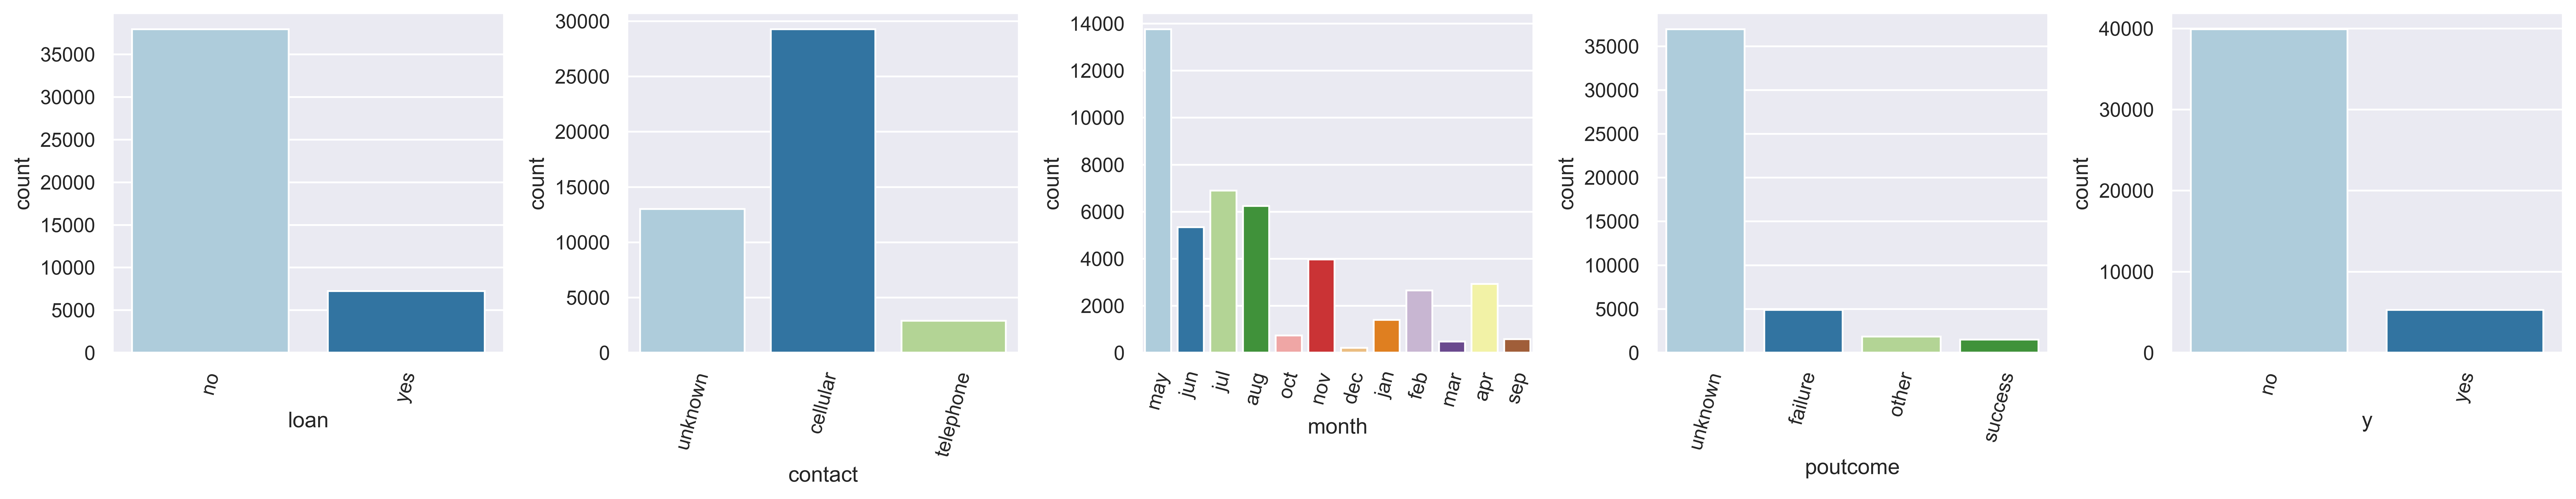

In [ ]:
# Plot the distribbution of categorical attributes
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

def histplot(df, cols, ncols):
    for lst in chunks(cols, ncols):
        sns.set(font_scale = 1)
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(20, 4), dpi=600)
        for idx in range(0, len(lst)):
            attr = lst[idx]
            data = df[attr]
            sns.set_palette('Paired',30)
            g = sns.countplot(x=attr, data=df, ax=axes[idx])
            for item in g.get_xticklabels():
                item.set_rotation(75)
        plt.tight_layout()

histplot(data[cat_cols], cat_cols, 5)

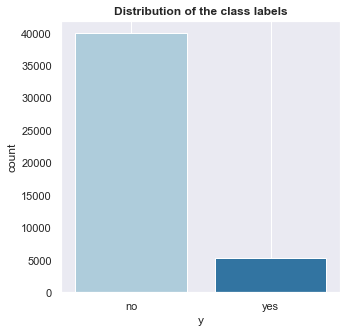

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data['y']) 
plt.grid() 
plt.title("Distribution of the class labels", weight="semibold") 
plt.show()

# Data Cleaning: Numeric Variables

Let's start by cleaning the numeric variables and viewing the basic statistics. 

In [ ]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Before moving on we will remove "duration" from our dataset because of target leakage, or the idea that the field gives information into the future. To put it in another way, this is information that we should not have yet. As noted above this field highly affects the output because if a person had a phone call duration of 0, we can assume the caller didn't pick up the phone and therefore had no chance of a sale.

In [ ]:
data.pop("duration")

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64

Becase "day represents the day of the week we should really treat this as a catigorical variable and not a numeric. Additionally, we will combine these values into 3 buckets: beginning of the month, middle of the month, and end of the month. This will prevent us from having 31 different one-hot encoded variables and generalize the variable so that it makes sense to the business problem at hand. After transforming "day" into a catigorical variable we will one-hot encode it with the other categoriccal variables.

In [ ]:
#start = beginning of the month
#middle = middle of the month
#end = end of the month

temp_day = []
for i in data['day']:
    if i<10:
        temp_day.append("start")
    elif i>20:
        temp_day.append("end")
    else:
        temp_day.append("middle")

data['day'] = temp_day

The variable "pdays" represents the number of days that passed by after the client was last contacted from a previous campaign. We need to also note that if the client was never contacted the value of this field is -1. Becuase a value of -1 doesn't make sense in this field and won't properly capture that a client wasn't contacted I would normally create a new binary variable but "poutcome" = nonexistant captures this for us.

Below are some interesting insights we can find from the data:

In [ ]:
neg_bal = float(len(data['balance'][data['balance']<0]))/float(len(data['balance']))
print("{:.2%}".format(neg_bal)+ " percent of people or "+str(int(neg_bal*11162))+ " people have a negative balance");

8.33% percent of people or 929 people have a negative balance


In [ ]:
first_contact = float(len(data['pdays'][data['pdays']==-1]))/float(len(data['pdays']))
print("Percentage of people that is being contacted for the first time: "+"{:.2%}".format(first_contact));

Percentage of people that is being contacted for the first time: 81.74%


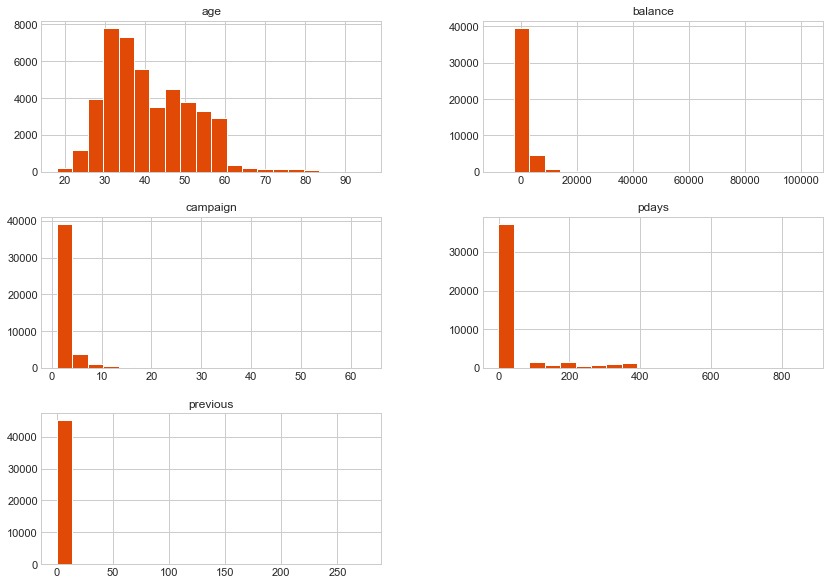

In [ ]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

As we saw from the above statistics of the numeric variables there are potential outliars. Let's talk about some of the max values for some of our variables: <br>

1 - **Balance:** It's not really unheard of to have $81,000 in your checking account. For example, this would make sense from one with a high salary, intersted in saving.<br> 

2 - **pdays:** It's a bit unusual to contact a lead after 854 days (almost 2.5 years) although it is plausable. For instance, maybe after 100 days they were removed from the marketing list but a flag was raised that might indicate that the person is likly will open an account and therefore be put back on the marketing list. Although they were removed then added back, it's possible that they never stopped counting the days in between.<br>

3 - **previous:** Like the previous variables that we discussed this one is also plausable. If a client was in multiple campaigns spanning of many quarters or even years can certainly add up to over 50 contacts.<br>

4 - **Campaign:** Being contated over 60 time for one marketing campaign is a bit unheard of even for a campaign that lasts a year. Think about it, after reaching out to a person 20 don't you think they probably aren't interested? Also, most companies won't waste money like that. This will need more investigating. <br>


# Outliar Analysis

In [ ]:
data.nlargest(20,"campaign")

age          job   marital  education default  balance housing loan  \
4330    45   management   married    unknown      no     9051     yes   no   
11914   24   technician    single    primary      no      126     yes   no   
5073    35   technician   married  secondary      no      432     yes   no   
4299    30   management    single   tertiary      no      358     yes   no   
5459    35  blue-collar   married  secondary      no      430     yes   no   
18713   35  blue-collar   married  secondary      no      280     yes  yes   
10697   28  blue-collar    single  secondary      no      235     yes   no   
18744   49  blue-collar   married    primary      no      371     yes   no   
4275    40  blue-collar   married  secondary      no     -365     yes   no   
13675   51  blue-collar   married    unknown      no       41     yes   no   
18660   33  blue-collar   married  secondary      no        0     yes  yes   
4334    42  blue-collar   married    primary      no      170     yes   no   
11301   28  blue-collar    single  secondary      no      623      no   no   
18616   34   management   married   tertiary      no        4     yes   no   
5721    48   management    single   tertiary      no      145     yes   no   
18704   44    housemaid   married    primary      no        0      no   no   
23062   38   management   married   tertiary      no        0     yes   no   
9964    26  blue-collar    single    primary      no      535     yes   no   
11884   50  blue-collar  divorced    unknown      no     2812     yes   no   
18513   57      retired   married    primary      no     3549      no   no   

         contact     day month  campaign  pdays  previous poutcome   y  
4330     unknown  middle   may        63     -1         0  unknown  no  
11914    unknown  middle   jun        58     -1         0  unknown  no  
5073     unknown     end   may        55     -1         0  unknown  no  
4299     unknown  middle   may        51     -1         0  unknown  no  
5459     unknown     end   may        50     -1         0  unknown  no  
18713   cellular     end   jul        50     -1         0  unknown  no  
10697    unknown  middle   jun        46     -1         0  unknown  no  
18744   cellular     end   jul        44     -1         0  unknown  no  
4275     unknown  middle   may        43     -1         0  unknown  no  
13675  telephone   start   jul        43     -1         0  unknown  no  
18660   cellular     end   jul        43     -1         0  unknown  no  
4334     unknown  middle   may        41     -1         0  unknown  no  
11301    unknown  middle   jun        41     -1         0  unknown  no  
18616   cellular     end   jul        39     -1         0  unknown  no  
5721     unknown     end   may        38     -1         0  unknown  no  
18704  telephone     end   jul        38     -1         0  unknown  no  
23062   cellular     end   aug        38     -1         0  unknown  no  
9964     unknown   start   jun        37     -1         0  unknown  no  
11884    unknown  middle   jun        37     -1         0  unknown  no  
18513   cellular     end   jul        36     -1         0  unknown  no

Based on the above data there is no indication of an error in the above data. It looks like all of the above data all have that they were previously not contacted before. I could be that possibly that the company wanted to take an aggesive approach to marketing to fresh leads. Because of this reasoning I will not take out any observations although I will make sure to keep this in mind. Although, I decided not to throw out any variables, there is certainly a strong case to be made for tossing rows or transforming the columns to adjust for the outliers.

# Data Cleaning: Catigorical Variables

In [ ]:
#populate a list with string-type columns
str_columns = []
for i in data.columns:
    if(type(data[i][0])==str):
        str_columns.append(i)

In [ ]:
print(str_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'y']


## Adjusting the Binary Categorical Variables

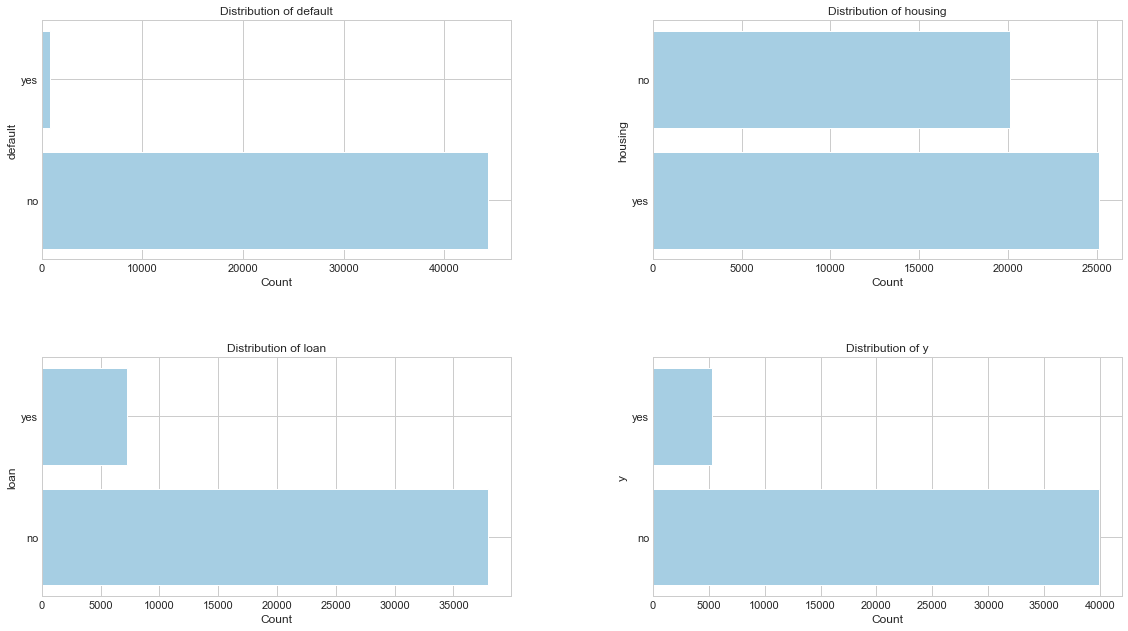

In [ ]:
fig, axes = plt.subplots(2,2)
fig.tight_layout(h_pad=2)

bin_list = [3,4,5,10]

for i in range(1,5):
    plt.subplot(2, 2, i)
    n = bin_list[i-1]
    counts = data[str_columns[n]].value_counts()
    plt.barh(y=counts.index, width=counts)
    plt.title('Distribution of '+str_columns[n])
    plt.ylabel(str_columns[n])
    plt.xlabel('Count')

plt.subplots_adjust(left=.25, bottom=2, right=2.75, top=4)

In [ ]:
# change the character values in the above columns to 0/1 binary values
# 0="no" and 1="yes"

data['default'] = [0 if i == "no" else 1 for i in data['default']]
data['housing'] = [0 if i == "no" else 1 for i in data['housing']]
data['loan']    = [0 if i == "no" else 1 for i in data['loan']   ]
data['y'] = [0 if i == "no" else 1 for i in data['y']]

In [ ]:
#check
print(data['default'].value_counts())
print(data['housing'].value_counts())
print(data['loan'].value_counts())
print(data['y'].value_counts())

0    44396
1      815
Name: default, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
0    39922
1     5289
Name: y, dtype: int64


In [ ]:
#adjust our string list and remove the four variables above
for i in ['default','housing','loan','y']:
    str_columns.remove(i)
    
print(str_columns)

['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome']


In [ ]:
data.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact    day month  campaign  pdays  previous poutcome  y  
0  unknown  start   may         1     -1         0  unknown  0  
1  unknown  start   may         1     -1         0  unknown  0  
2  unknown  start   may         1     -1         0  unknown  0  
3  unknown  start   may         1     -1         0  unknown  0  
4  unknown  start   may         1     -1         0  unknown  0

## Adjusting the other categorical variables

In [ ]:
print(str_columns)

['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome']


Above we adjusted the binary categorical variables and turned them into numeric variables that we can work with. Now we can transform the categorical variables that contain more than one unique value using one-hot encoding. Before we transform the variables we must view the distribtion to get an idea of the behavior for each variable.

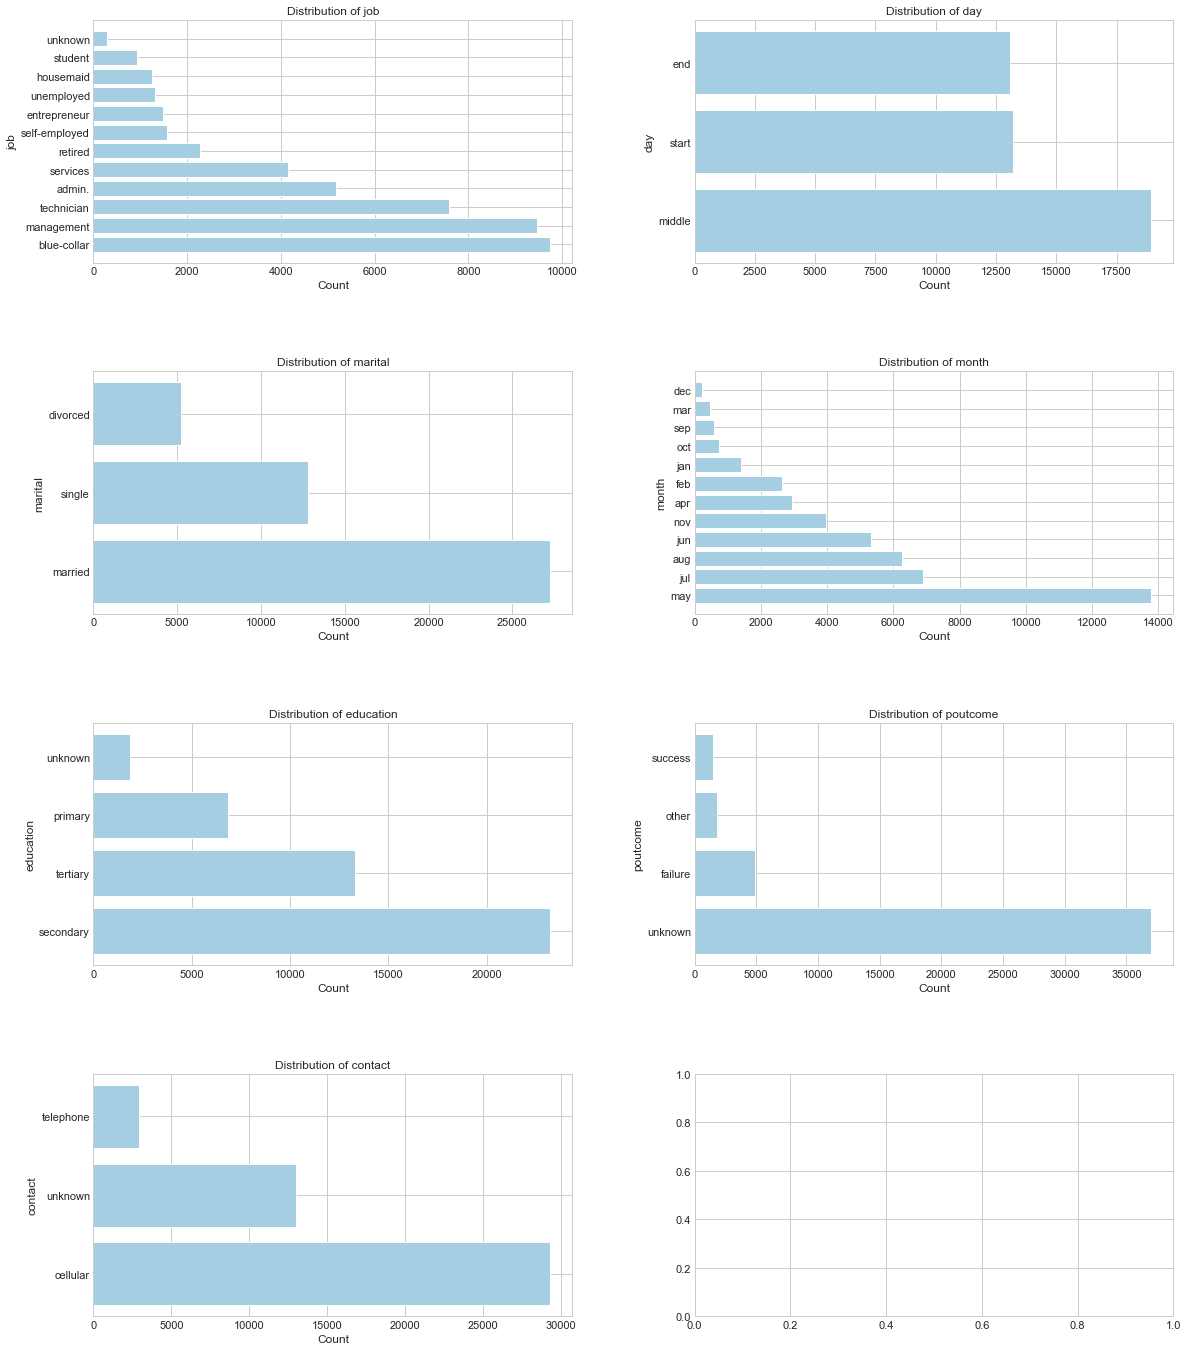

In [ ]:
fig, axes = plt.subplots(4,2)
fig.tight_layout(h_pad=.25)

j = 0
k = 0 
for i in range(1,8):
    if k==4:
        k=0
        j=1
    plt.subplot2grid((4, 2), (k,j))
    n = i-1
    counts = data[str_columns[n]].value_counts()
    plt.barh(y=counts.index, width=counts)
    plt.title('Distribution of '+str_columns[n])
    plt.ylabel(str_columns[n])
    plt.xlabel('Count')
    k=k+1
                     
plt.subplots_adjust(left=.25, bottom=.5, right=2.75, top=5)

A few notes from the above distributions:

+ It's interesting that the largest volume of calls happen in the summer months and weakest in the colder months.
+ Remember that "poutcome" reflects how they responded to a previous campaign. We should note that about 75% in this category is labeled as "unknown" which is consistant with what we found earlier.
+ based on the demographic variables, it seems like this campaign targets middle class individuals which supports the statistics from our "balance" variable.  

This information will be valuable when we review the results of our final model

In [ ]:
# let's use one-hot encodin to change the categorical variables to numericals
data = pd.get_dummies(data)
print(len(data.columns))
print(data.columns)

50
Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_end', 'day_middle', 'day_start', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


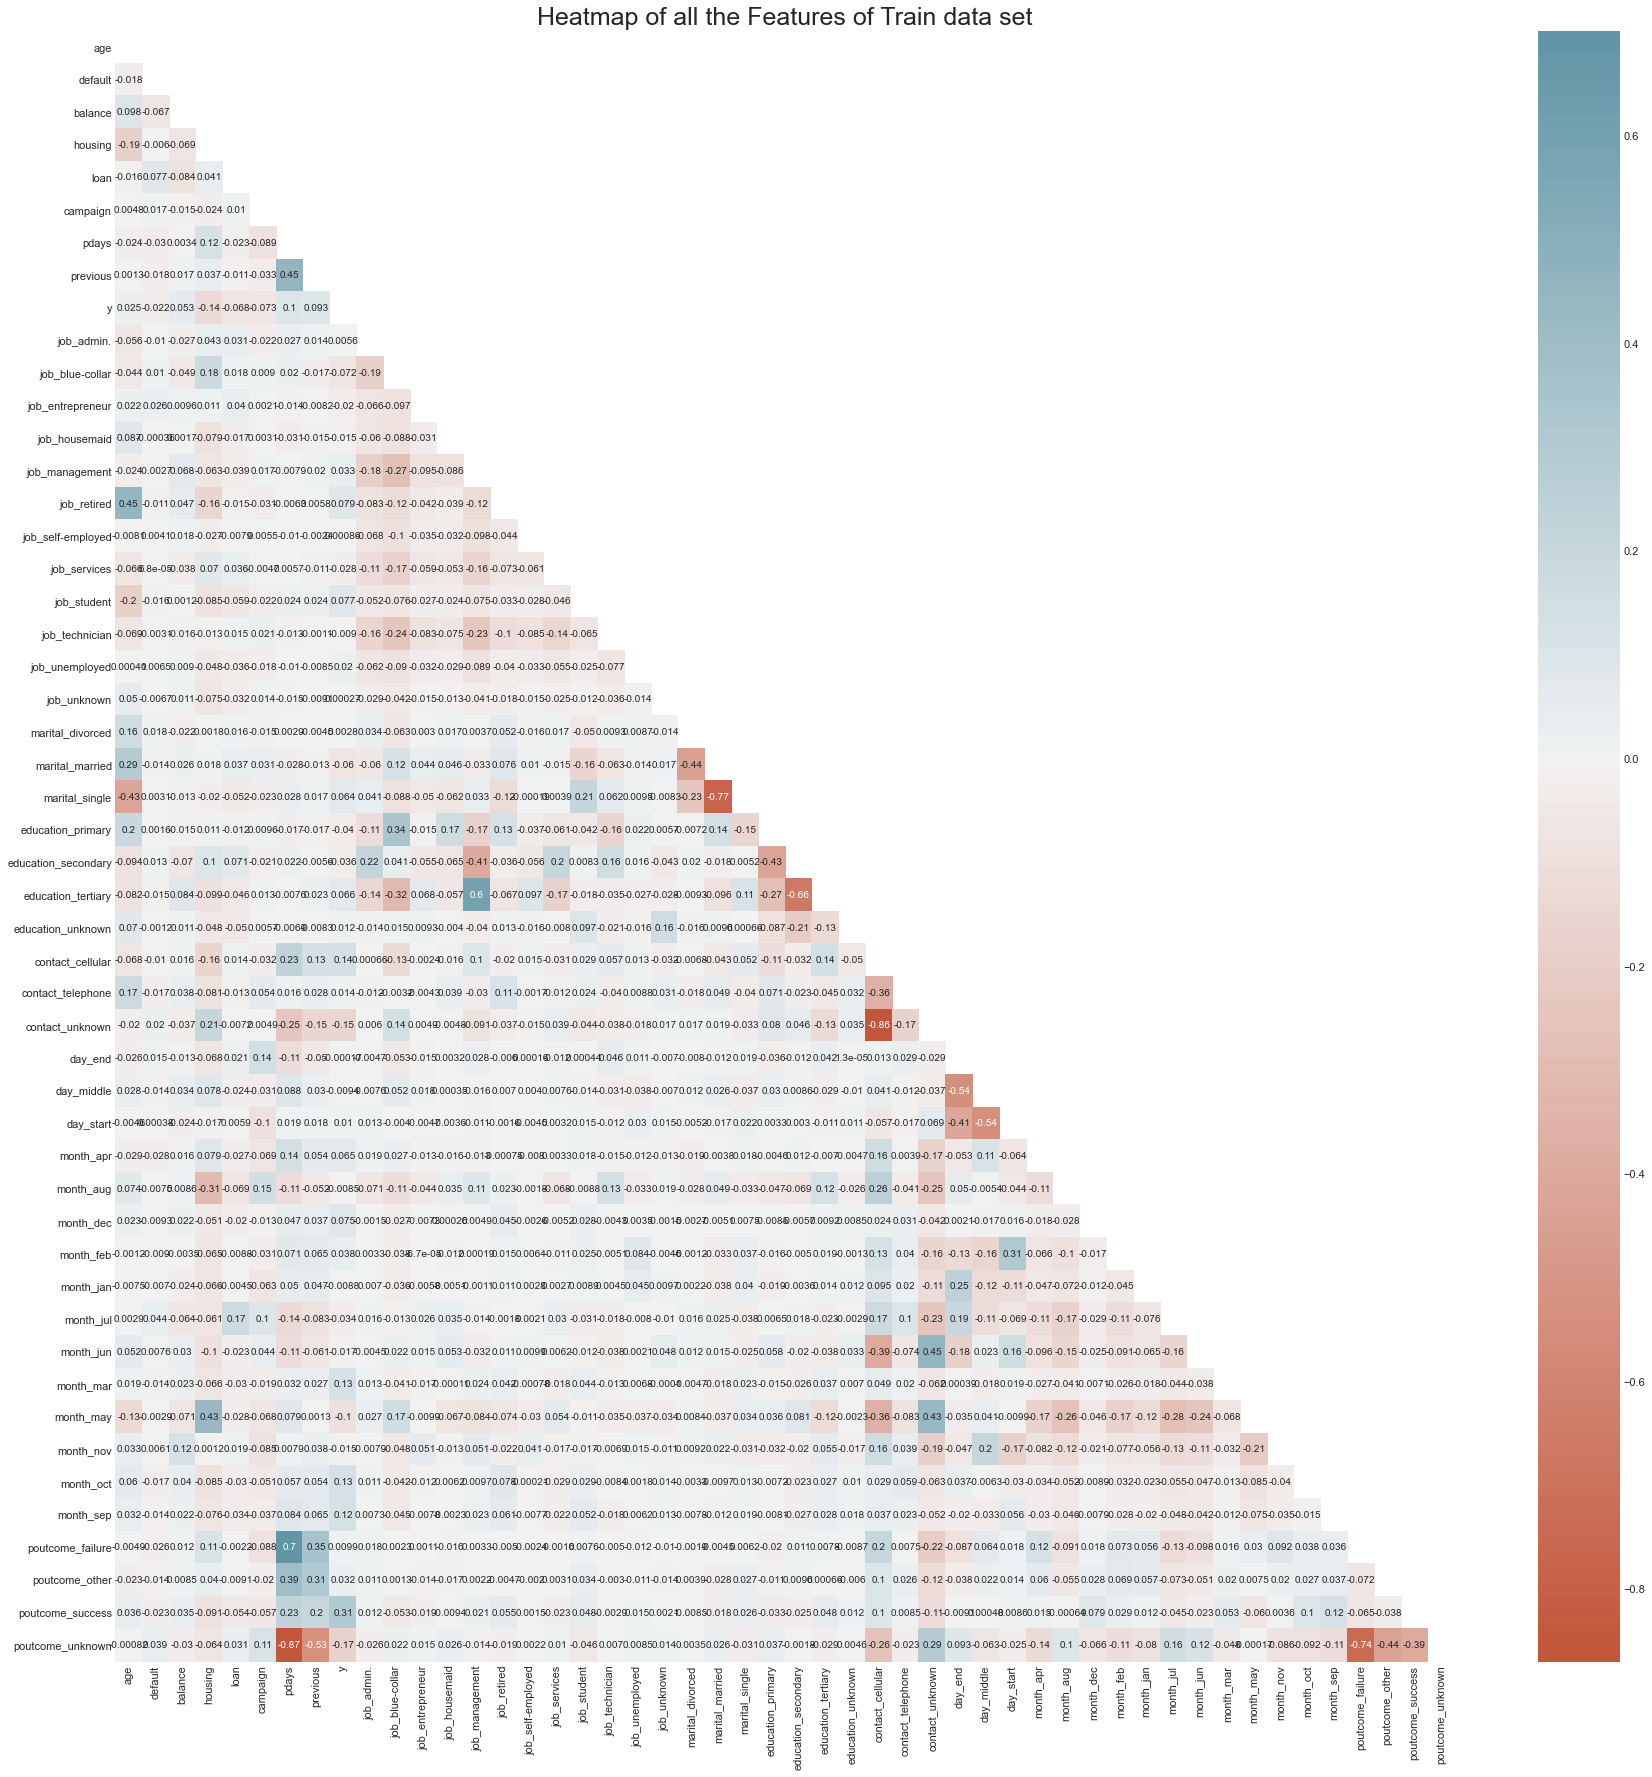

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

Based on the above correlation table the categorical variables that got encoded with exactly 3 unique values appear to have multicolinnearity. This can probably be attributed to the fact that 2 of the encoded values will together have information on the third. For example, if there are three choices between pcoucome (success, failure, unknown) and it wasn't a success or a failure, the data will assume it was unknown. Therefore we can remove one of these encoded variables from each of the categorical varible with three unique values.

In [ ]:
   #delete: poutcome_unknown, marital_single, day_end, contact_unknown

data.pop("poutcome_unknown")
data.pop("marital_single")
data.pop("day_end")
data.pop("contact_unknown")
data.pop("education_unknown")

0        0
1        0
2        0
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: education_unknown, Length: 45211, dtype: uint8

In [ ]:
dataset = data.copy(deep = True)

# Modeling

Below are a few functions to streamline our modeling

In [ ]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    #Tune HPs
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    #f = plt.figure(figsize=(20, 3))
    
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total Deposit = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score for Training Dataset = {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,ax=ax2)
    g2.set_title(title)
    g2.set_ylabel('Total Deposit = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score for Testing Dataset = {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,ax=ax3)
    g3.set_title(title)
    g3.set_ylabel('Total Deposit = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score for Total Dataset = {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    
    yc = y_test
    #ypredc = model.predict(X_test)
    ypredc = model.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(yc, ypredc[:,1])
    roc_auc = auc(fpr, tpr)
    

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    precision, recall, thresholds = precision_recall_curve(yc, ypredc[:,1])
    auc_score = auc(recall, precision)
    print('auc score is: ', auc_score)
    pyplot.plot(recall, precision, marker='.')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    return y, model.predict(X)

In [ ]:
import plotly.graph_objects as go

def Featureimportances(models, X_train, y_train):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = data.columns
    if len(importances)<len(features): 
        features = data.columns[:len(importances)]
    else:
        importances = model.feature_importances_[:len(features)]
    imp = pd.DataFrame({'Features': features, 'Importance': importances})
    imp = imp.sort_values(by = 'Importance', ascending=False)[:20]
    imp['Sum Importance'] = imp['Importance'].cumsum()
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=imp.Features,y=imp.Importance, marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

    fig.update_layout(title="Feature Importance",
                                 xaxis_title="Features", yaxis_title="Importance",title_x=0.5, paper_bgcolor="mintcream",
                                 title_font_size=20)
    fig.show()

In [ ]:
def Definedata():
    # define dataset
    X=data.drop(columns=['y']).values
    y=data['y'].values
    return X, y

In [ ]:
# define dataset
data.dropna(inplace=True)
X=data.drop(columns=['y']).values
y=data['y'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

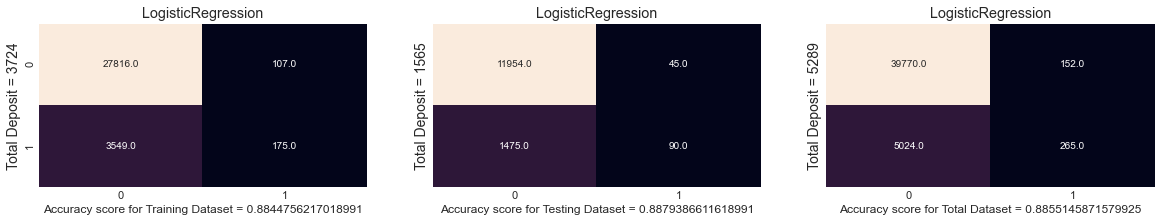

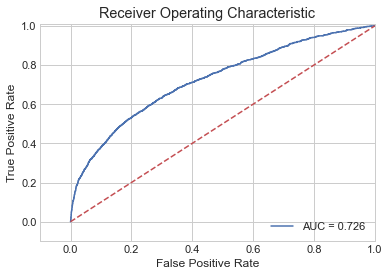

No handles with labels found to put in legend.


auc score is:  0.32271320616874194


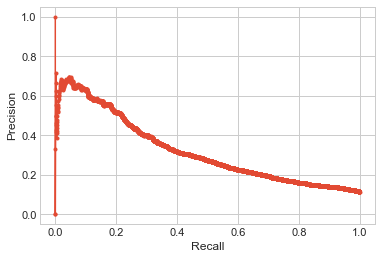

Wall time: 1.52 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
title = 'LogisticRegression'
%time Models(LogisticRegression(),X_train, X_test, y_train, y_test, title) 

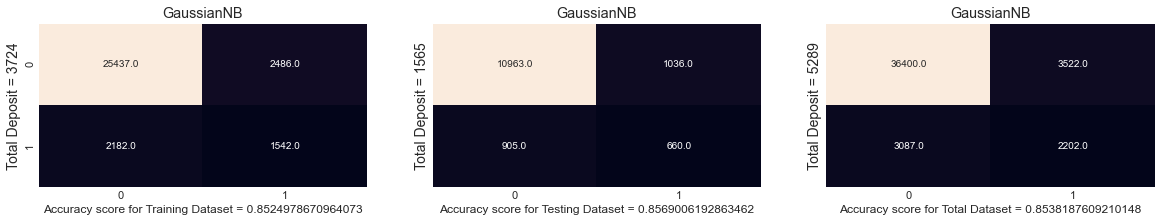

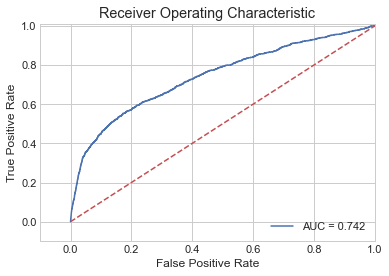

No handles with labels found to put in legend.


auc score is:  0.3665027693242128


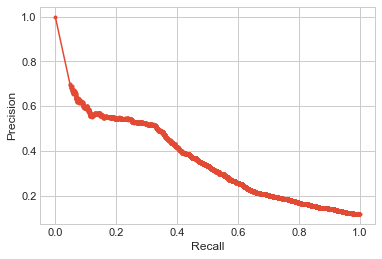

Wall time: 1.27 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [ ]:
title = 'GaussianNB'
%time Models(GaussianNB(),X_train, X_test, y_train, y_test, title)

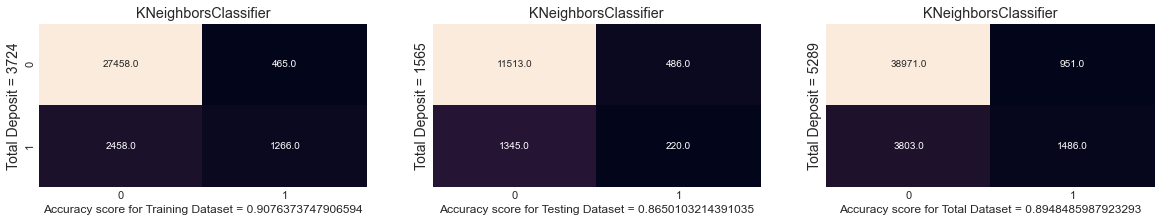

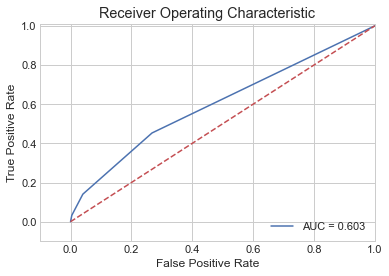

No handles with labels found to put in legend.


auc score is:  0.22616211495433175


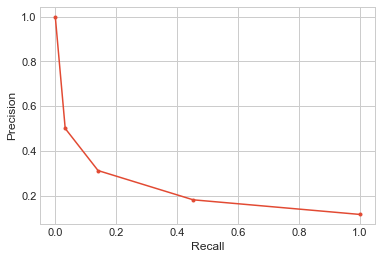

Wall time: 14.2 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
title = 'KNeighborsClassifier'
%time Models(KNeighborsClassifier(n_neighbors=3),X_train, X_test, y_train, y_test, title)

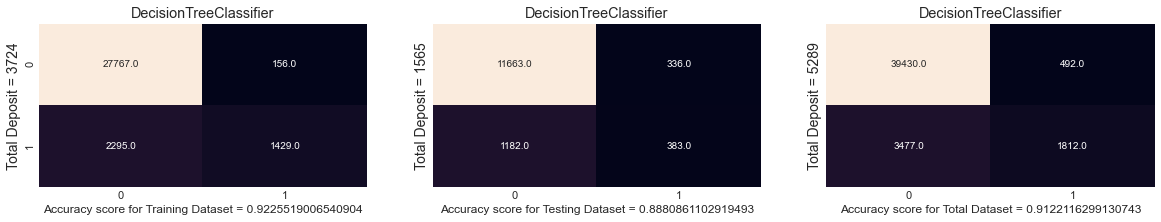

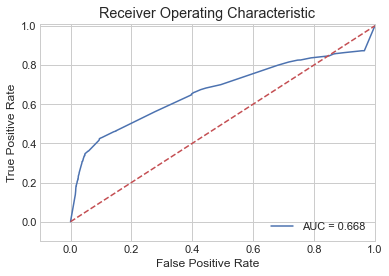

No handles with labels found to put in legend.


auc score is:  0.3482793256825648


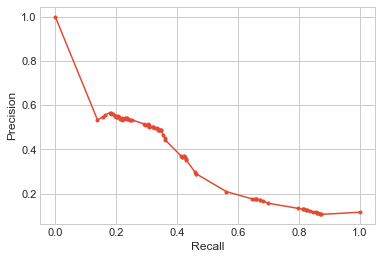

Wall time: 1.03 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [ ]:
title = 'DecisionTreeClassifier'
%time Models(DecisionTreeClassifier(max_depth=14),X_train, X_test, y_train, y_test, title)

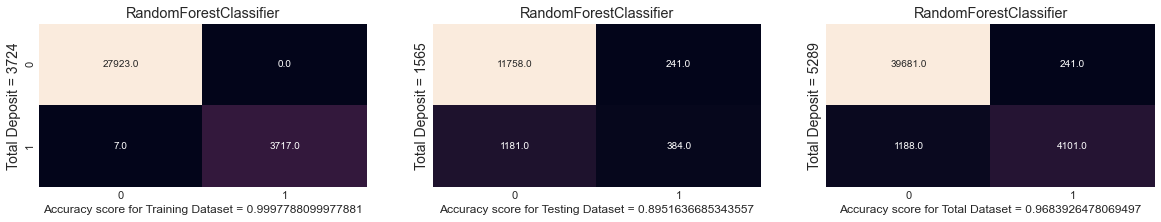

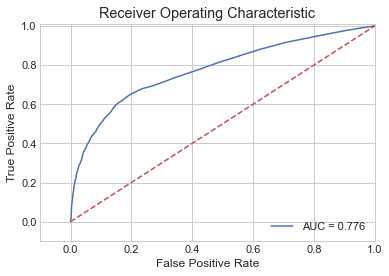

No handles with labels found to put in legend.


auc score is:  0.41152624133514265


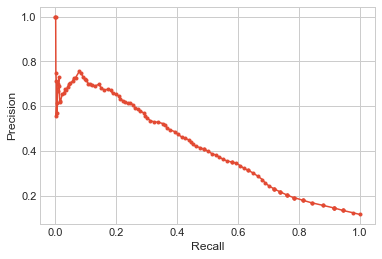

Wall time: 8.27 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
title = 'RandomForestClassifier'
%time Models(RandomForestClassifier(),X_train, X_test, y_train, y_test, title)

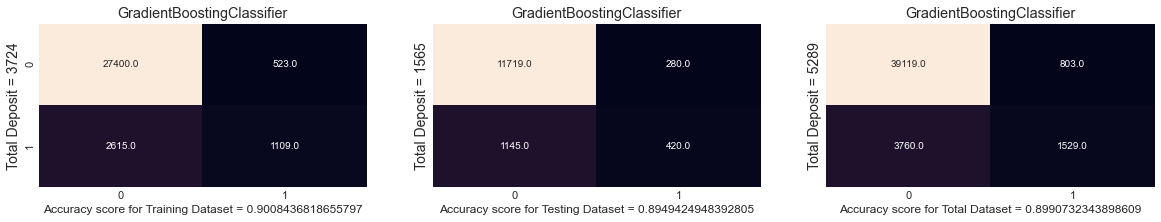

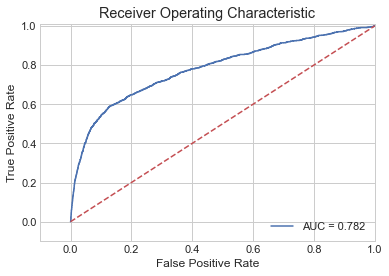

No handles with labels found to put in legend.


auc score is:  0.421249301118763


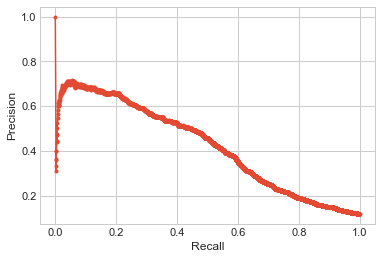

Wall time: 4.12 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
title = 'GradientBoostingClassifier'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train, X_test, y_train, y_test, title)

[11:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


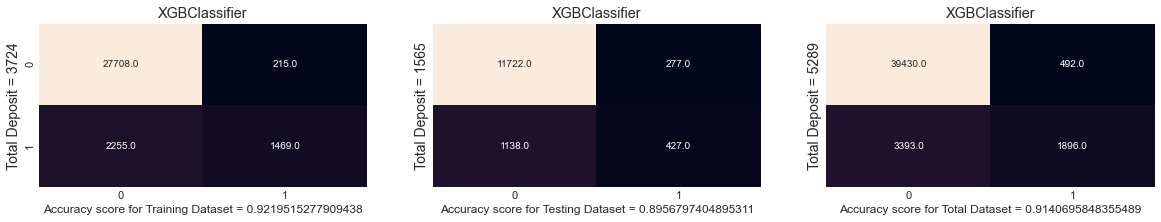

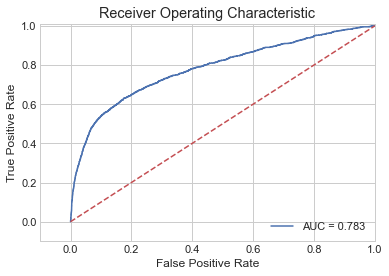

No handles with labels found to put in legend.


auc score is:  0.4311211737708029


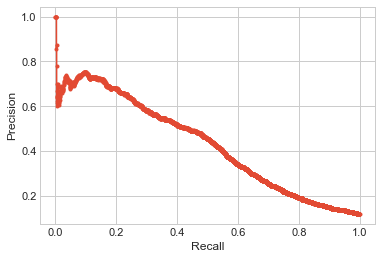

Wall time: 2.92 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
title = 'XGBClassifier'
%time Models(XGBClassifier(),X_train, X_test, y_train, y_test, title)

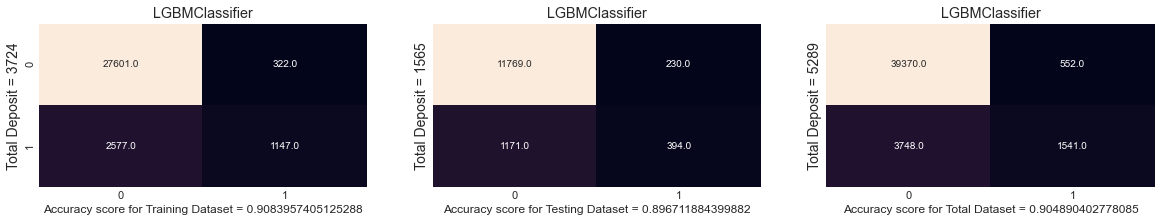

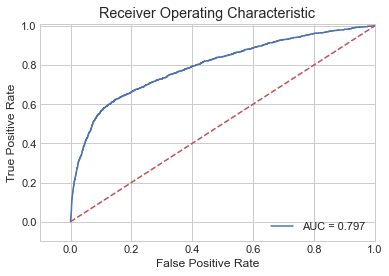

No handles with labels found to put in legend.


auc score is:  0.4471354999854332


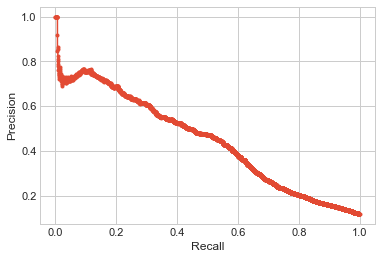

Wall time: 1.74 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
title = 'LGBMClassifier'
%time Models(LGBMClassifier(),X_train, X_test, y_train, y_test, title)

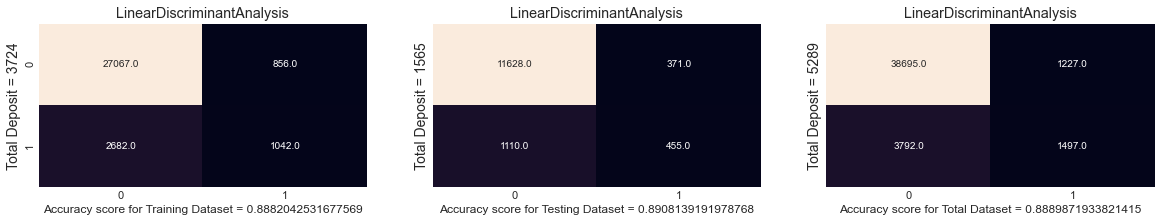

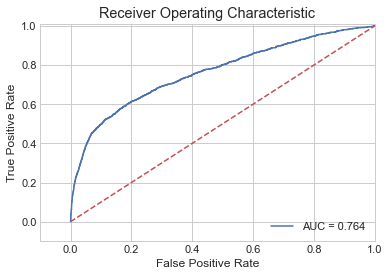

No handles with labels found to put in legend.


auc score is:  0.4075688478050963


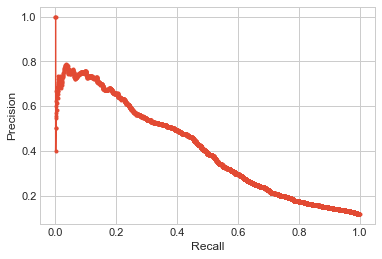

Wall time: 1.29 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [ ]:
title = 'LinearDiscriminantAnalysis'
%time Models(LinearDiscriminantAnalysis(),X_train, X_test, y_train, y_test, title)

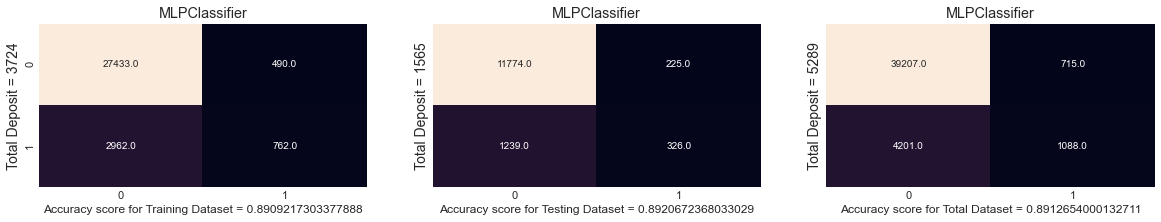

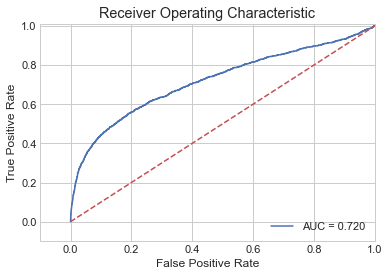

No handles with labels found to put in legend.


auc score is:  0.3675169360569872


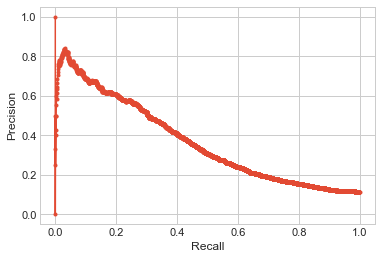

Wall time: 7.85 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [ ]:
from sklearn.neural_network import MLPClassifier
title = 'MLPClassifier'
%time Models(MLPClassifier(hidden_layer_sizes=(40,15), max_iter=1000),X_train, X_test, y_train, y_test, title)

# SHAP

In [ ]:
!pip install shap

In [ ]:
X=data.drop(columns=['y'])
y=data['y']

In [ ]:
X.head()

age  default  balance  housing  loan  campaign  pdays  previous  \
0   58        0     2143        1     0         1     -1         0   
1   44        0       29        1     0         1     -1         0   
2   33        0        2        1     1         1     -1         0   
3   47        0     1506        1     0         1     -1         0   
4   33        0        1        0     0         1     -1         0   

   job_admin.  job_blue-collar  ...  month_jul  month_jun  month_mar  \
0           0                0  ...          0          0          0   
1           0                0  ...          0          0          0   
2           0                0  ...          0          0          0   
3           0                1  ...          0          0          0   
4           0                0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0          1          0          0          0                 0   
1          1          0          0          0                 0   
2          1          0          0          0                 0   
3          1          0          0          0                 0   
4          1          0          0          0                 0   

   poutcome_other  poutcome_success  
0               0                 0  
1               0                 0  
2               0                 0  
3               0                 0  
4               0                 0  

[5 rows x 44 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [ ]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
#model = xgboost.train({"learning_rate": 0.001}, xgboost.DMatrix(X_train, label=y_train), 1000)

model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

[11:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[2121,:], X_test.iloc[2121,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0:100,:], X_test.iloc[0:100,:])

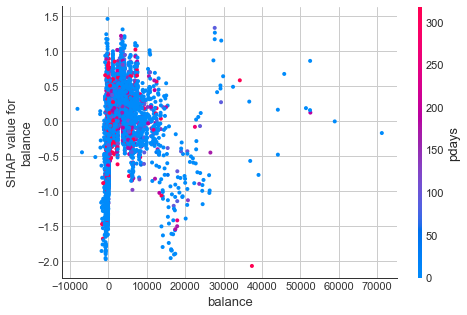

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("balance", shap_values, X_test)

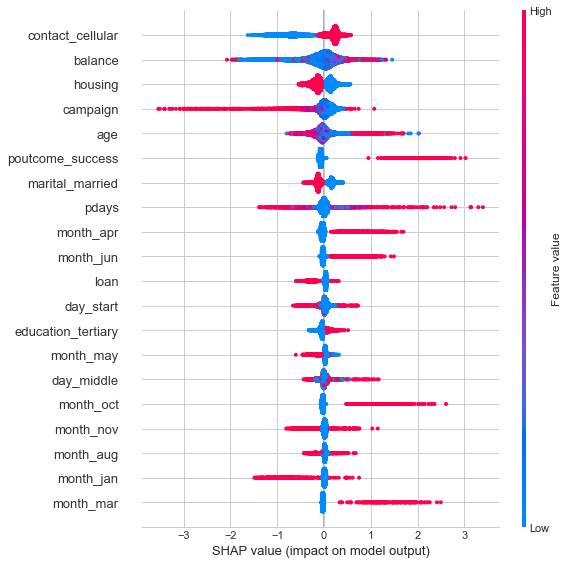

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

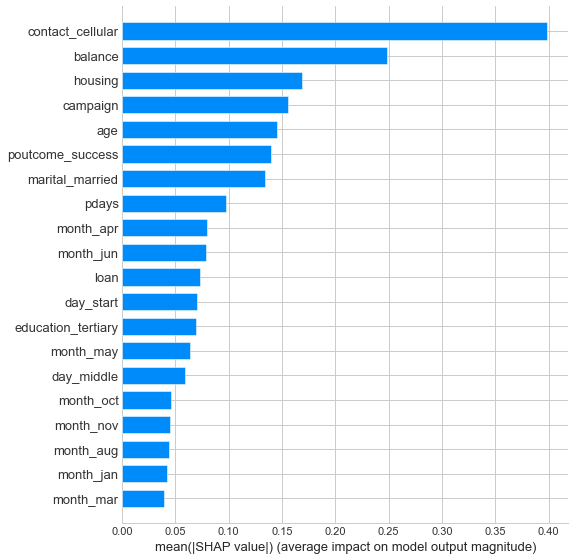

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
result = X_test.copy(deep = True)
result['Prediction'] = model.predict(X_test)
result['Probability'] = model.predict_proba(X_test)[:,1]

In [ ]:
result.head()

age  default  balance  housing  loan  campaign  pdays  previous  \
28127   30        0      370        0     0         1    246         1   
20256   56        0     1780        0     0         2     -1         0   
6285    40        0      290        1     0         1     -1         0   
198     43        0      400        1     0         1     -1         0   
2417    28        0       52        1     0         1     -1         0   

       job_admin.  job_blue-collar  ...  month_mar  month_may  month_nov  \
28127           0                0  ...          0          0          0   
20256           0                0  ...          0          0          0   
6285            0                0  ...          0          1          0   
198             0                0  ...          0          1          0   
2417            0                1  ...          0          1          0   

       month_oct  month_sep  poutcome_failure  poutcome_other  \
28127          0          0                 0               1   
20256          0          0                 0               0   
6285           0          0                 0               0   
198            0          0                 0               0   
2417           0          0                 0               0   

       poutcome_success  Prediction  Probability  
28127                 0           0     0.028026  
20256                 0           0     0.077795  
6285                  0           0     0.051673  
198                   0           0     0.030542  
2417                  0           0     0.038768  

[5 rows x 46 columns]

In [ ]:
target_customer = result[result['Prediction'] == 1]
print(len(target_customer))

704


In [ ]:
index = shap_values.argmax(axis = 1)
result['Important Attribute'] = X_test.columns[index]

In [ ]:
def potential_customers(df: pd.DataFrame, cut_off = 0.5):
    potential_customers = df[df['Probability'] >= cut_off]
    non_potential_customers = len(df) - len(potential_customers)
    return potential_customers, len(potential_customers), non_potential_customers

In [ ]:
cut_offs = np.linspace(0,1,100)
num_customers = []
non_potential_customers = []
for i in cut_offs:
    _, num_customer, non_potential_customer = potential_customers(result, i)
    num_customers.append(num_customer)
    non_potential_customers.append(non_potential_customer)

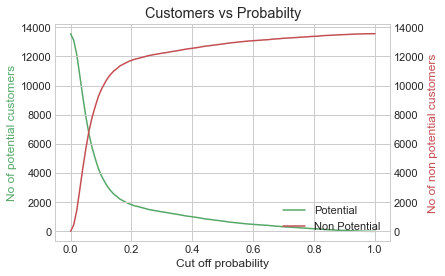

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# create line plot of y1(x)
line1, = ax1.plot(cut_offs, num_customers , 'g', label="Potential")
ax1.set_xlabel('Cut off probability')
ax1.set_ylabel('No of potential customers', color='g')

# create shared axis for y2(x)
ax2 = ax1.twinx()

# create line plot of y2(x)
line2, = ax2.plot(cut_offs, non_potential_customers , 'r', label="Non Potential")
ax2.set_ylabel('No of non potential customers', color='r')

# set title, plot limits, etc
plt.title('Customers vs Probabilty')


# add a legend, and position it on the upper right
plt.legend((line1, line2), ('Potential', 'Non Potential'))

plt.show()

In [ ]:
result.head()

age  default  balance  housing  loan  campaign  pdays  previous  \
28127   30        0      370        0     0         1    246         1   
20256   56        0     1780        0     0         2     -1         0   
6285    40        0      290        1     0         1     -1         0   
198     43        0      400        1     0         1     -1         0   
2417    28        0       52        1     0         1     -1         0   

       job_admin.  job_blue-collar  ...  month_may  month_nov  month_oct  \
28127           0                0  ...          0          0          0   
20256           0                0  ...          0          0          0   
6285            0                0  ...          1          0          0   
198             0                0  ...          1          0          0   
2417            0                1  ...          1          0          0   

       month_sep  poutcome_failure  poutcome_other  poutcome_success  \
28127          0                 0               1                 0   
20256          0                 0               0                 0   
6285           0                 0               0                 0   
198            0                 0               0                 0   
2417           0                 0               0                 0   

       Prediction  Probability  Important Attribute  
28127           0     0.028026              housing  
20256           0     0.077795              balance  
6285            0     0.051673      marital_married  
198             0     0.030542                  age  
2417            0     0.038768            day_start  

[5 rows x 47 columns]

In [ ]:
def important_features(df: pd.DataFrame, X_test: pd.DataFrame, shap_values: np.ndarray):
    PositiveSHAPfeatures = []
    for i in range(len(df)):
        ind = [j for j in range(len(shap_values[i])) if shap_values[i][j]>0]
        PositiveSHAPfeatures.append(X_test.columns[ind])
    df['PositiveSHAPfeatures'] = PositiveSHAPfeatures
    return df

In [ ]:
result = important_features(result, X_test, shap_values)

In [ ]:
result.head()

age  default  balance  housing  loan  campaign  pdays  previous  \
28127   30        0      370        0     0         1    246         1   
20256   56        0     1780        0     0         2     -1         0   
6285    40        0      290        1     0         1     -1         0   
198     43        0      400        1     0         1     -1         0   
2417    28        0       52        1     0         1     -1         0   

       job_admin.  job_blue-collar  ...  month_nov  month_oct  month_sep  \
28127           0                0  ...          0          0          0   
20256           0                0  ...          0          0          0   
6285            0                0  ...          0          0          0   
198             0                0  ...          0          0          0   
2417            0                1  ...          0          0          0   

       poutcome_failure  poutcome_other  poutcome_success  Prediction  \
28127                 0               1                 0           0   
20256                 0               0                 0           0   
6285                  0               0                 0           0   
198                   0               0                 0           0   
2417                  0               0                 0           0   

       Probability  Important Attribute  \
28127     0.028026              housing   
20256     0.077795              balance   
6285      0.051673      marital_married   
198       0.030542                  age   
2417      0.038768            day_start   

                                    PositiveSHAPfeatures  
28127  Index(['default', 'housing', 'loan', 'job_entr...  
20256  Index(['balance', 'housing', 'loan', 'job_entr...  
6285   Index(['age', 'loan', 'campaign', 'pdays', 'jo...  
198    Index(['age', 'loan', 'campaign', 'pdays', 'jo...  
2417   Index(['age', 'default', 'loan', 'campaign', '...  

[5 rows x 48 columns]

In [ ]:
result.to_excel('target_customer.xlsx')

# Analyze the Strongest Model

Let's take a closer look at the XGBClassifier since that was one of our most predictive models

Above we have our 3 confustion matricies along with an ROC curve.To briefly analyze the confusion matricies, we have a strong Accuracy for our test set with a value of about 0.895 and a strong Accuacy for our full dataset with an Accuracy of about 0.914. 

Below the confustion matricies, we can see the ROC curve with a value of 0.625 which is not very strong. The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. In other words, the 45-degree line represents randomly choosing an outcome.

In [ ]:
Featureimportances(XGBClassifier(), X_train, y_train)

[11:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


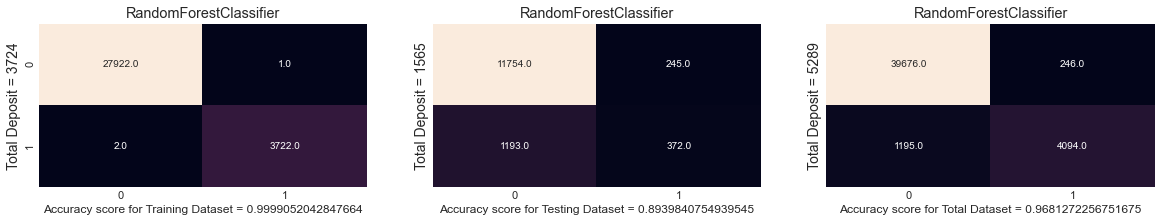

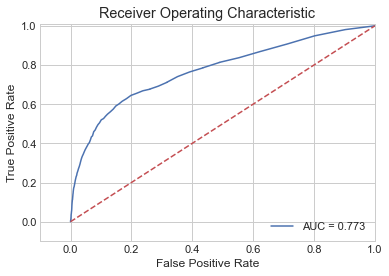

No handles with labels found to put in legend.


auc score is:  0.4074328831293309


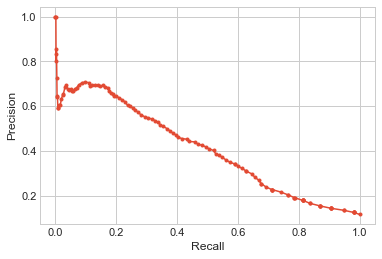

Wall time: 8 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'bootstrap': [True],
     'max_depth': [6, 20],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [3, 10],
     'min_samples_split': [4, 10],
     'n_estimators': [100, 1000]
    }
     

model = RandomForestClassifier()

best_model = RandomizedSearchCV(model, param_grid, cv=5,
                                  scoring="accuracy",
                                  return_train_score=True,
                                  verbose=True,
                                  n_jobs=-1)

title = 'RandomForestClassifier'
%time Models(RandomForestClassifier(),X_train, X_test, y_train, y_test, title)

In [ ]:
!pip install optuna
import optuna

In [ ]:
import xgboost as xgb

In [ ]:
def objective(trial):
    X, y = Definedata()
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dtest = xgb.DMatrix(test_x, label=test_y)

    tree_method = ['exact','approx','hist']
    boosting_list = ['gbtree', 'gblinear']
    objective_list_reg = ['reg:linear', 'reg:gamma', 'reg:tweedie']
    params ={'boosting':trial.suggest_categorical('boosting', boosting_list),
            'tree_method':trial.suggest_categorical('tree_method', tree_method),
            'max_depth':trial.suggest_int('max_depth', 2, 25),
            'reg_alpha':trial.suggest_int('reg_alpha', 0, 5),
            'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
            'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
            'gamma':trial.suggest_int('gamma', 0, 5),
            'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5)
            }

    #model = XGBClassifier(params)
    #model.fit(train_x, train_y)
    model = xgb.train(params,dtrain,evals=[(dtest, "Test")],early_stopping_rounds=10)
    preds = model.predict(dtest)
    accuracy = accuracy_score(preds.round(), test_y)
    return accuracy

In [ ]:
study = optuna.create_study()
history = study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2021-02-19 12:42:45,910] A new study created in memory with name: no-name-d6b20553-a88d-445e-bdd0-7cf70a8ca7a9


[12:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49696
[1]	Test-rmse:0.49395
[2]	Test-rmse:0.49098
[3]	Test-rmse:0.48806
[4]	Test-rmse:0.48517
[5]	Test-rmse:0.48232
[6]	Test-rmse:0.47950
[7]	Test-rmse:0.47673
[8]	Test-rmse:0.47399
[9]	Test-rmse:0.47129


[I 2021-02-19 12:42:46,109] Trial 0 finished with value: 0.8951636685343557 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 4, 'reg_alpha': 5, 'reg_lambda': 3, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.00950686619819075}. Best is trial 0 with value: 0.8951636685343557.


[12:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.37812
[1]	Test-rmse:0.32361
[2]	Test-rmse:0.30129
[3]	Test-rmse:0.29265
[4]	Test-rmse:0.28860
[5]	Test-rmse:0.28662
[6]	Test-rmse:0.28577
[7]	Test-rmse:0.28561
[8]	Test-rmse:0.28554
[9]	Test-rmse:0.28551


[I 2021-02-19 12:42:46,813] Trial 1 finished with value: 0.8956060159245061 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 21, 'reg_alpha': 3, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 4, 'learning_rate': 0.40436094072897694}. Best is trial 0 with value: 0.8951636685343557.


[12:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49598
[1]	Test-rmse:0.49202
[2]	Test-rmse:0.48814
[3]	Test-rmse:0.48431
[4]	Test-rmse:0.48056
[5]	Test-rmse:0.47687
[6]	Test-rmse:0.47324
[7]	Test-rmse:0.46968
[8]	Test-rmse:0.46617
[9]	Test-rmse:0.46273


[I 2021-02-19 12:42:47,038] Trial 2 finished with value: 0.8953111176644057 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 5, 'reg_alpha': 5, 'reg_lambda': 5, 'min_child_weight': 5, 'gamma': 1, 'learning_rate': 0.012491971013183186}. Best is trial 0 with value: 0.8951636685343557.


[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.37319
[1]	Test-rmse:0.31997
[2]	Test-rmse:0.29872
[3]	Test-rmse:0.29150
[4]	Test-rmse:0.28873
[5]	Test-rmse:0.28790
[6]	Test-rmse:0.28760
[7]	Test-rmse:0.28748
[8]	Test-rmse:0.28743
[9]	Test-rmse:0.28741


[I 2021-02-19 12:42:47,656] Trial 3 finished with value: 0.8961958124447066 and parameters: {'boosting': 'gbtree', 'tree_method': 'hist', 'max_depth': 25, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.42072382318795226}. Best is trial 0 with value: 0.8951636685343557.


[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.40092
[1]	Test-rmse:0.34489
[2]	Test-rmse:0.31519
[3]	Test-rmse:0.29996
[4]	Test-rmse:0.29260
[5]	Test-rmse:0.28815
[6]	Test-rmse:0.28623
[7]	Test-rmse:0.28500
[8]	Test-rmse:0.28435
[9]	Test-rmse:0.28377


[I 2021-02-19 12:42:48,484] Trial 4 finished with value: 0.8964169861397818 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 20, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.31777791101030173}. Best is trial 0 with value: 0.8951636685343557.


[12:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49032
[1]	Test-rmse:0.48104
[2]	Test-rmse:0.47216
[3]	Test-rmse:0.46363
[4]	Test-rmse:0.45544
[5]	Test-rmse:0.44761
[6]	Test-rmse:0.44010
[7]	Test-rmse:0.43292
[8]	Test-rmse:0.42603
[9]	Test-rmse:0.41946


[I 2021-02-19 12:42:48,764] Trial 5 finished with value: 0.8951636685343557 and parameters: {'boosting': 'gblinear', 'tree_method': 'exact', 'max_depth': 6, 'reg_alpha': 5, 'reg_lambda': 4, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.02999106365221897}. Best is trial 0 with value: 0.8951636685343557.


[12:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49176
[1]	Test-rmse:0.48380
[2]	Test-rmse:0.47610
[3]	Test-rmse:0.46866
[4]	Test-rmse:0.46147
[5]	Test-rmse:0.45455
[6]	Test-rmse:0.44784
[7]	Test-rmse:0.44138
[8]	Test-rmse:0.43516
[9]	Test-rmse:0.42911


[I 2021-02-19 12:42:49,144] Trial 6 finished with value: 0.895532291359481 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 10, 'reg_alpha': 2, 'reg_lambda': 1, 'min_child_weight': 3, 'gamma': 3, 'learning_rate': 0.025193697392297817}. Best is trial 0 with value: 0.8951636685343557.


[12:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.48723
[1]	Test-rmse:0.47516
[2]	Test-rmse:0.46375
[3]	Test-rmse:0.45295
[4]	Test-rmse:0.44278
[5]	Test-rmse:0.43317
[6]	Test-rmse:0.42405
[7]	Test-rmse:0.41543
[8]	Test-rmse:0.40732
[9]	Test-rmse:0.39970


[I 2021-02-19 12:42:49,284] Trial 7 finished with value: 0.8951636685343557 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 5, 'reg_alpha': 4, 'reg_lambda': 5, 'min_child_weight': 5, 'gamma': 4, 'learning_rate': 0.03985892364420996}. Best is trial 0 with value: 0.8951636685343557.


[12:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.45082
[1]	Test-rmse:0.41241
[2]	Test-rmse:0.38284
[3]	Test-rmse:0.35985
[4]	Test-rmse:0.34249
[5]	Test-rmse:0.32939
[6]	Test-rmse:0.31986
[7]	Test-rmse:0.31275
[8]	Test-rmse:0.30694
[9]	Test-rmse:0.30269


[I 2021-02-19 12:42:49,461] Trial 8 finished with value: 0.8956060159245061 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.15881752685645945}. Best is trial 0 with value: 0.8951636685343557.


[12:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.40646
[1]	Test-rmse:0.35280
[2]	Test-rmse:0.32290
[3]	Test-rmse:0.30839
[4]	Test-rmse:0.30123
[5]	Test-rmse:0.29821
[6]	Test-rmse:0.29706
[7]	Test-rmse:0.29707
[8]	Test-rmse:0.29791
[9]	Test-rmse:0.29896


[I 2021-02-19 12:42:50,258] Trial 9 finished with value: 0.8892657033323503 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 24, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.298208875256472}. Best is trial 9 with value: 0.8892657033323503.


[12:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.46408
[1]	Test-rmse:0.43368
[2]	Test-rmse:0.40797
[3]	Test-rmse:0.38631
[4]	Test-rmse:0.36832
[5]	Test-rmse:0.35346
[6]	Test-rmse:0.34107
[7]	Test-rmse:0.33102
[8]	Test-rmse:0.32290
[9]	Test-rmse:0.31605


[I 2021-02-19 12:42:51,202] Trial 10 finished with value: 0.8913299911530522 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.10910213064087293}. Best is trial 9 with value: 0.8892657033323503.


[12:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.45921
[1]	Test-rmse:0.42560
[2]	Test-rmse:0.39785
[3]	Test-rmse:0.37516
[4]	Test-rmse:0.35709
[5]	Test-rmse:0.34252
[6]	Test-rmse:0.33099
[7]	Test-rmse:0.32170
[8]	Test-rmse:0.31422
[9]	Test-rmse:0.30873


[I 2021-02-19 12:42:52,128] Trial 11 finished with value: 0.8908139191978768 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.12431549778271604}. Best is trial 9 with value: 0.8892657033323503.


[12:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.46138
[1]	Test-rmse:0.42925
[2]	Test-rmse:0.40227
[3]	Test-rmse:0.38020
[4]	Test-rmse:0.36177
[5]	Test-rmse:0.34702
[6]	Test-rmse:0.33516
[7]	Test-rmse:0.32584
[8]	Test-rmse:0.31843
[9]	Test-rmse:0.31280


[I 2021-02-19 12:42:53,450] Trial 12 finished with value: 0.8887496313771749 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 25, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.11779890477273257}. Best is trial 12 with value: 0.8887496313771749.


[12:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.43426
[1]	Test-rmse:0.38698
[2]	Test-rmse:0.35363
[3]	Test-rmse:0.33053
[4]	Test-rmse:0.31523
[5]	Test-rmse:0.30527
[6]	Test-rmse:0.29858
[7]	Test-rmse:0.29374
[8]	Test-rmse:0.29103
[9]	Test-rmse:0.28963


[I 2021-02-19 12:42:53,949] Trial 13 finished with value: 0.8937629017988794 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 25, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.20483437063563992}. Best is trial 12 with value: 0.8887496313771749.


[12:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.47589
[1]	Test-rmse:0.45419
[2]	Test-rmse:0.43466
[3]	Test-rmse:0.41714
[4]	Test-rmse:0.40138
[5]	Test-rmse:0.38740
[6]	Test-rmse:0.37502
[7]	Test-rmse:0.36399
[8]	Test-rmse:0.35404
[9]	Test-rmse:0.34539


[I 2021-02-19 12:42:54,764] Trial 14 finished with value: 0.8959009141846063 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 22, 'reg_alpha': 2, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.07334757013407912}. Best is trial 12 with value: 0.8887496313771749.


[12:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.47915
[1]	Test-rmse:0.46007
[2]	Test-rmse:0.44261
[3]	Test-rmse:0.42676
[4]	Test-rmse:0.41225
[5]	Test-rmse:0.39904
[6]	Test-rmse:0.38710
[7]	Test-rmse:0.37631
[8]	Test-rmse:0.36656
[9]	Test-rmse:0.35779


[I 2021-02-19 12:42:55,421] Trial 15 finished with value: 0.8960483633146564 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 25, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.06299024971522114}. Best is trial 12 with value: 0.8887496313771749.


[12:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.41611
[1]	Test-rmse:0.36281
[2]	Test-rmse:0.33026
[3]	Test-rmse:0.31147
[4]	Test-rmse:0.30097
[5]	Test-rmse:0.29459
[6]	Test-rmse:0.29182
[7]	Test-rmse:0.29017
[8]	Test-rmse:0.28947
[9]	Test-rmse:0.28936


[I 2021-02-19 12:42:56,368] Trial 16 finished with value: 0.8911825420230021 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 2, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.26595806729542715}. Best is trial 12 with value: 0.8887496313771749.


[12:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.47195
[1]	Test-rmse:0.44713
[2]	Test-rmse:0.42532
[3]	Test-rmse:0.40614
[4]	Test-rmse:0.38939
[5]	Test-rmse:0.37484
[6]	Test-rmse:0.36217
[7]	Test-rmse:0.35112
[8]	Test-rmse:0.34174
[9]	Test-rmse:0.33352


[I 2021-02-19 12:42:56,989] Trial 17 finished with value: 0.8953111176644057 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 11, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.08610559579616339}. Best is trial 12 with value: 0.8887496313771749.


[12:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.44053
[1]	Test-rmse:0.39591
[2]	Test-rmse:0.36300
[3]	Test-rmse:0.33926
[4]	Test-rmse:0.32256
[5]	Test-rmse:0.31057
[6]	Test-rmse:0.30235
[7]	Test-rmse:0.29647
[8]	Test-rmse:0.29242
[9]	Test-rmse:0.28955


[I 2021-02-19 12:42:57,502] Trial 18 finished with value: 0.8969330580949573 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 23, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 3, 'gamma': 2, 'learning_rate': 0.1840050966177787}. Best is trial 12 with value: 0.8887496313771749.


[12:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.36382
[1]	Test-rmse:0.31241
[2]	Test-rmse:0.29423
[3]	Test-rmse:0.28929
[4]	Test-rmse:0.28839
[5]	Test-rmse:0.28843
[6]	Test-rmse:0.28908
[7]	Test-rmse:0.28960
[8]	Test-rmse:0.29084
[9]	Test-rmse:0.29189


[I 2021-02-19 12:42:57,964] Trial 19 finished with value: 0.8952373930993807 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 19, 'reg_alpha': 2, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.4575385864142921}. Best is trial 12 with value: 0.8887496313771749.


[12:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.42060
[1]	Test-rmse:0.36817
[2]	Test-rmse:0.33527
[3]	Test-rmse:0.31473
[4]	Test-rmse:0.30242
[5]	Test-rmse:0.29501
[6]	Test-rmse:0.29048
[7]	Test-rmse:0.28766
[8]	Test-rmse:0.28626
[9]	Test-rmse:0.28535


[I 2021-02-19 12:42:59,299] Trial 20 finished with value: 0.8964907107048068 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 24, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.250352948426115}. Best is trial 12 with value: 0.8887496313771749.


[12:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.46125
[1]	Test-rmse:0.42892
[2]	Test-rmse:0.40200
[3]	Test-rmse:0.37970
[4]	Test-rmse:0.36144
[5]	Test-rmse:0.34648
[6]	Test-rmse:0.33448
[7]	Test-rmse:0.32460
[8]	Test-rmse:0.31692
[9]	Test-rmse:0.31087


[I 2021-02-19 12:43:00,308] Trial 21 finished with value: 0.8928782070185786 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 15, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.11793927275963557}. Best is trial 12 with value: 0.8887496313771749.


[12:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.45522
[1]	Test-rmse:0.41900
[2]	Test-rmse:0.38969
[3]	Test-rmse:0.36642
[4]	Test-rmse:0.34801
[5]	Test-rmse:0.33397
[6]	Test-rmse:0.32319
[7]	Test-rmse:0.31448
[8]	Test-rmse:0.30801
[9]	Test-rmse:0.30312


[I 2021-02-19 12:43:01,099] Trial 22 finished with value: 0.8938366263639045 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 12, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.1378187521125836}. Best is trial 12 with value: 0.8887496313771749.


[12:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.48358
[1]	Test-rmse:0.46837
[2]	Test-rmse:0.45420
[3]	Test-rmse:0.44100
[4]	Test-rmse:0.42868
[5]	Test-rmse:0.41725
[6]	Test-rmse:0.40655
[7]	Test-rmse:0.39673
[8]	Test-rmse:0.38761
[9]	Test-rmse:0.37916


[I 2021-02-19 12:43:01,734] Trial 23 finished with value: 0.8941315246240047 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.05002953411478481}. Best is trial 12 with value: 0.8887496313771749.


[12:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.46585
[1]	Test-rmse:0.43651
[2]	Test-rmse:0.41141
[3]	Test-rmse:0.38995
[4]	Test-rmse:0.37200
[5]	Test-rmse:0.35689
[6]	Test-rmse:0.34404
[7]	Test-rmse:0.33342
[8]	Test-rmse:0.32466
[9]	Test-rmse:0.31734


[I 2021-02-19 12:43:02,748] Trial 24 finished with value: 0.8964907107048068 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 17, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.10428980805766666}. Best is trial 12 with value: 0.8887496313771749.


[12:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.44347
[1]	Test-rmse:0.40078
[2]	Test-rmse:0.36882
[3]	Test-rmse:0.34541
[4]	Test-rmse:0.32838
[5]	Test-rmse:0.31652
[6]	Test-rmse:0.30826
[7]	Test-rmse:0.30189
[8]	Test-rmse:0.29779
[9]	Test-rmse:0.29507


[I 2021-02-19 12:43:03,813] Trial 25 finished with value: 0.8907401946328517 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 14, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.17444437053068323}. Best is trial 12 with value: 0.8887496313771749.


[12:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.43376
[1]	Test-rmse:0.38606
[2]	Test-rmse:0.35271
[3]	Test-rmse:0.32953
[4]	Test-rmse:0.31445
[5]	Test-rmse:0.30354
[6]	Test-rmse:0.29699
[7]	Test-rmse:0.29237
[8]	Test-rmse:0.28939
[9]	Test-rmse:0.28746


[I 2021-02-19 12:43:04,244] Trial 26 finished with value: 0.8969330580949573 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 14, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 3, 'gamma': 1, 'learning_rate': 0.20680413579457943}. Best is trial 12 with value: 0.8887496313771749.


[12:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.40668
[1]	Test-rmse:0.35207
[2]	Test-rmse:0.32160
[3]	Test-rmse:0.30479
[4]	Test-rmse:0.29640
[5]	Test-rmse:0.29130
[6]	Test-rmse:0.28845
[7]	Test-rmse:0.28663
[8]	Test-rmse:0.28612
[9]	Test-rmse:0.28586


[I 2021-02-19 12:43:05,603] Trial 27 finished with value: 0.8952373930993807 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 22, 'reg_alpha': 2, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 3, 'learning_rate': 0.29931666422529446}. Best is trial 12 with value: 0.8887496313771749.


[12:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.44553
[1]	Test-rmse:0.40340
[2]	Test-rmse:0.37143
[3]	Test-rmse:0.34762
[4]	Test-rmse:0.32999
[5]	Test-rmse:0.31687
[6]	Test-rmse:0.30770
[7]	Test-rmse:0.30092
[8]	Test-rmse:0.29600
[9]	Test-rmse:0.29248


[I 2021-02-19 12:43:07,070] Trial 28 finished with value: 0.8959009141846063 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 2, 'learning_rate': 0.16867932359401397}. Best is trial 12 with value: 0.8887496313771749.


[12:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.47431
[1]	Test-rmse:0.45130
[2]	Test-rmse:0.43073
[3]	Test-rmse:0.41241
[4]	Test-rmse:0.39615
[5]	Test-rmse:0.38183
[6]	Test-rmse:0.36901
[7]	Test-rmse:0.35780
[8]	Test-rmse:0.34806
[9]	Test-rmse:0.33946


[I 2021-02-19 12:43:07,546] Trial 29 finished with value: 0.8940578000589796 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 23, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.07783038711660498}. Best is trial 12 with value: 0.8887496313771749.


[12:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.39088
[1]	Test-rmse:0.33492
[2]	Test-rmse:0.30788
[3]	Test-rmse:0.29576
[4]	Test-rmse:0.29044
[5]	Test-rmse:0.28794
[6]	Test-rmse:0.28714
[7]	Test-rmse:0.28677
[8]	Test-rmse:0.28643
[9]	Test-rmse:0.28647


[I 2021-02-19 12:43:08,616] Trial 30 finished with value: 0.8948687702742554 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 13, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.35383248328847783}. Best is trial 12 with value: 0.8887496313771749.


[12:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.45791
[1]	Test-rmse:0.42343
[2]	Test-rmse:0.39521
[3]	Test-rmse:0.37233
[4]	Test-rmse:0.35423
[5]	Test-rmse:0.33975
[6]	Test-rmse:0.32827
[7]	Test-rmse:0.31926
[8]	Test-rmse:0.31213
[9]	Test-rmse:0.30683


[I 2021-02-19 12:43:09,903] Trial 31 finished with value: 0.8902978472427012 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.1284115340567037}. Best is trial 12 with value: 0.8887496313771749.


[12:43:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.35729
[1]	Test-rmse:0.30950
[2]	Test-rmse:0.29634
[3]	Test-rmse:0.29375
[4]	Test-rmse:0.29368
[5]	Test-rmse:0.29491
[6]	Test-rmse:0.29538
[7]	Test-rmse:0.29727
[8]	Test-rmse:0.29831
[9]	Test-rmse:0.29886


[I 2021-02-19 12:43:11,051] Trial 32 finished with value: 0.8880123857269242 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 14, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.4853222676343461}. Best is trial 32 with value: 0.8880123857269242.


[12:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.37150
[1]	Test-rmse:0.31802
[2]	Test-rmse:0.29830
[3]	Test-rmse:0.29115
[4]	Test-rmse:0.28870
[5]	Test-rmse:0.28736
[6]	Test-rmse:0.28662
[7]	Test-rmse:0.28643
[8]	Test-rmse:0.28557
[9]	Test-rmse:0.28566


[I 2021-02-19 12:43:11,634] Trial 33 finished with value: 0.8938366263639045 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 7, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.4378870902338639}. Best is trial 32 with value: 0.8880123857269242.


[12:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.42716
[1]	Test-rmse:0.37689
[2]	Test-rmse:0.34363
[3]	Test-rmse:0.32188
[4]	Test-rmse:0.30788
[5]	Test-rmse:0.29916
[6]	Test-rmse:0.29352
[7]	Test-rmse:0.29011
[8]	Test-rmse:0.28810
[9]	Test-rmse:0.28659


[I 2021-02-19 12:43:12,879] Trial 34 finished with value: 0.8967856089649071 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 17, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.2284628489928647}. Best is trial 32 with value: 0.8880123857269242.


[12:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.39227
[1]	Test-rmse:0.33657
[2]	Test-rmse:0.31003
[3]	Test-rmse:0.29831
[4]	Test-rmse:0.29290
[5]	Test-rmse:0.29024
[6]	Test-rmse:0.28917
[7]	Test-rmse:0.28882
[8]	Test-rmse:0.28810
[9]	Test-rmse:0.28797


[I 2021-02-19 12:43:13,501] Trial 35 finished with value: 0.8940578000589796 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.3566951048221652}. Best is trial 32 with value: 0.8880123857269242.


[12:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.35618
[1]	Test-rmse:0.30691
[2]	Test-rmse:0.29188
[3]	Test-rmse:0.28736
[4]	Test-rmse:0.28557
[5]	Test-rmse:0.28464
[6]	Test-rmse:0.28469
[7]	Test-rmse:0.28493
[8]	Test-rmse:0.28488
[9]	Test-rmse:0.28505


[I 2021-02-19 12:43:13,831] Trial 36 finished with value: 0.8956060159245061 and parameters: {'boosting': 'gbtree', 'tree_method': 'hist', 'max_depth': 12, 'reg_alpha': 4, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.48992361378061755}. Best is trial 32 with value: 0.8880123857269242.


[12:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.48065
[1]	Test-rmse:0.46285
[2]	Test-rmse:0.44643
[3]	Test-rmse:0.43136
[4]	Test-rmse:0.41754
[5]	Test-rmse:0.40482
[6]	Test-rmse:0.39324
[7]	Test-rmse:0.38267
[8]	Test-rmse:0.37308
[9]	Test-rmse:0.36430


[I 2021-02-19 12:43:15,078] Trial 37 finished with value: 0.8965644352698319 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.05858500788184847}. Best is trial 32 with value: 0.8880123857269242.


[12:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49332
[1]	Test-rmse:0.48683
[2]	Test-rmse:0.48049
[3]	Test-rmse:0.47435
[4]	Test-rmse:0.46836
[5]	Test-rmse:0.46255
[6]	Test-rmse:0.45690
[7]	Test-rmse:0.45139
[8]	Test-rmse:0.44604
[9]	Test-rmse:0.44086


[I 2021-02-19 12:43:16,049] Trial 38 finished with value: 0.8956060159245061 and parameters: {'boosting': 'gbtree', 'tree_method': 'exact', 'max_depth': 21, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 4, 'learning_rate': 0.020141060813994083}. Best is trial 32 with value: 0.8880123857269242.


[12:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.46916
[1]	Test-rmse:0.44218
[2]	Test-rmse:0.41876
[3]	Test-rmse:0.39841
[4]	Test-rmse:0.38091
[5]	Test-rmse:0.36583
[6]	Test-rmse:0.35293
[7]	Test-rmse:0.34199
[8]	Test-rmse:0.33270
[9]	Test-rmse:0.32478


[I 2021-02-19 12:43:16,613] Trial 39 finished with value: 0.8972279563550575 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.09394237273900448}. Best is trial 32 with value: 0.8880123857269242.


[12:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.45461
[1]	Test-rmse:0.41801
[2]	Test-rmse:0.38861
[3]	Test-rmse:0.36535
[4]	Test-rmse:0.34686
[5]	Test-rmse:0.33287
[6]	Test-rmse:0.32224
[7]	Test-rmse:0.31411
[8]	Test-rmse:0.30784
[9]	Test-rmse:0.30312


[I 2021-02-19 12:43:17,795] Trial 40 finished with value: 0.8920672368033029 and parameters: {'boosting': 'gblinear', 'tree_method': 'exact', 'max_depth': 24, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.1388171848224691}. Best is trial 32 with value: 0.8880123857269242.


[12:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49774
[1]	Test-rmse:0.49550
[2]	Test-rmse:0.49328
[3]	Test-rmse:0.49108
[4]	Test-rmse:0.48891
[5]	Test-rmse:0.48675
[6]	Test-rmse:0.48462
[7]	Test-rmse:0.48251
[8]	Test-rmse:0.48041
[9]	Test-rmse:0.47834


[I 2021-02-19 12:43:18,934] Trial 41 finished with value: 0.8891182542023002 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 15, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.0067420524409611314}. Best is trial 32 with value: 0.8880123857269242.


[12:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.48867
[1]	Test-rmse:0.47793
[2]	Test-rmse:0.46768
[3]	Test-rmse:0.45790
[4]	Test-rmse:0.44857
[5]	Test-rmse:0.43973
[6]	Test-rmse:0.43128
[7]	Test-rmse:0.42325
[8]	Test-rmse:0.41560
[9]	Test-rmse:0.40835


[I 2021-02-19 12:43:20,095] Trial 42 finished with value: 0.8902978472427012 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 15, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.033887888889052434}. Best is trial 32 with value: 0.8880123857269242.


[12:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49816
[1]	Test-rmse:0.49634
[2]	Test-rmse:0.49454
[3]	Test-rmse:0.49274
[4]	Test-rmse:0.49096
[5]	Test-rmse:0.48919
[6]	Test-rmse:0.48744
[7]	Test-rmse:0.48570
[8]	Test-rmse:0.48397
[9]	Test-rmse:0.48226


[I 2021-02-19 12:43:21,054] Trial 43 finished with value: 0.8907401946328517 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 13, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.005483250688907773}. Best is trial 32 with value: 0.8880123857269242.


[12:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49831
[1]	Test-rmse:0.49662
[2]	Test-rmse:0.49495
[3]	Test-rmse:0.49329
[4]	Test-rmse:0.49164
[5]	Test-rmse:0.49001
[6]	Test-rmse:0.48838
[7]	Test-rmse:0.48676
[8]	Test-rmse:0.48516
[9]	Test-rmse:0.48356


[I 2021-02-19 12:43:21,861] Trial 44 finished with value: 0.8950162194043055 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 11, 'reg_alpha': 1, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.005121162374007171}. Best is trial 32 with value: 0.8880123857269242.


[12:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49636
[1]	Test-rmse:0.49278
[2]	Test-rmse:0.48925
[3]	Test-rmse:0.48578
[4]	Test-rmse:0.48235
[5]	Test-rmse:0.47897
[6]	Test-rmse:0.47565
[7]	Test-rmse:0.47237
[8]	Test-rmse:0.46915
[9]	Test-rmse:0.46598


[I 2021-02-19 12:43:22,974] Trial 45 finished with value: 0.8908139191978768 and parameters: {'boosting': 'gbtree', 'tree_method': 'approx', 'max_depth': 15, 'reg_alpha': 0, 'reg_lambda': 4, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.01085328784955233}. Best is trial 32 with value: 0.8880123857269242.


[12:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49774
[1]	Test-rmse:0.49551
[2]	Test-rmse:0.49330
[3]	Test-rmse:0.49111
[4]	Test-rmse:0.48895
[5]	Test-rmse:0.48680
[6]	Test-rmse:0.48468
[7]	Test-rmse:0.48258
[8]	Test-rmse:0.48049
[9]	Test-rmse:0.47842


[I 2021-02-19 12:43:24,044] Trial 46 finished with value: 0.8890445296372751 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 15, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.006714486372973875}. Best is trial 32 with value: 0.8880123857269242.


[12:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49768
[1]	Test-rmse:0.49538
[2]	Test-rmse:0.49311
[3]	Test-rmse:0.49085
[4]	Test-rmse:0.48862
[5]	Test-rmse:0.48641
[6]	Test-rmse:0.48421
[7]	Test-rmse:0.48204
[8]	Test-rmse:0.47989
[9]	Test-rmse:0.47776


[I 2021-02-19 12:43:24,735] Trial 47 finished with value: 0.8953111176644057 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 10, 'reg_alpha': 3, 'reg_lambda': 1, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.007033765230298832}. Best is trial 32 with value: 0.8880123857269242.


[12:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49780
[1]	Test-rmse:0.49561
[2]	Test-rmse:0.49344
[3]	Test-rmse:0.49129
[4]	Test-rmse:0.48917
[5]	Test-rmse:0.48706
[6]	Test-rmse:0.48497
[7]	Test-rmse:0.48290
[8]	Test-rmse:0.48085
[9]	Test-rmse:0.47881


[I 2021-02-19 12:43:25,099] Trial 48 finished with value: 0.8911825420230021 and parameters: {'boosting': 'gblinear', 'tree_method': 'hist', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 4, 'min_child_weight': 3, 'gamma': 0, 'learning_rate': 0.006605521135385629}. Best is trial 32 with value: 0.8880123857269242.


[12:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49462
[1]	Test-rmse:0.48936
[2]	Test-rmse:0.48423
[3]	Test-rmse:0.47920
[4]	Test-rmse:0.47429
[5]	Test-rmse:0.46949
[6]	Test-rmse:0.46480
[7]	Test-rmse:0.46021
[8]	Test-rmse:0.45573
[9]	Test-rmse:0.45135


[I 2021-02-19 12:43:26,068] Trial 49 finished with value: 0.8953848422294308 and parameters: {'boosting': 'gblinear', 'tree_method': 'exact', 'max_depth': 25, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 4, 'gamma': 5, 'learning_rate': 0.016209502562041723}. Best is trial 32 with value: 0.8880123857269242.


[12:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49737
[1]	Test-rmse:0.49478
[2]	Test-rmse:0.49222
[3]	Test-rmse:0.48968
[4]	Test-rmse:0.48718
[5]	Test-rmse:0.48470
[6]	Test-rmse:0.48226
[7]	Test-rmse:0.47984
[8]	Test-rmse:0.47744
[9]	Test-rmse:0.47507


[I 2021-02-19 12:43:26,422] Trial 50 finished with value: 0.8953111176644057 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 3, 'reg_alpha': 5, 'reg_lambda': 4, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.008226469492836778}. Best is trial 32 with value: 0.8880123857269242.


[12:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49601
[1]	Test-rmse:0.49208
[2]	Test-rmse:0.48822
[3]	Test-rmse:0.48443
[4]	Test-rmse:0.48070
[5]	Test-rmse:0.47702
[6]	Test-rmse:0.47342
[7]	Test-rmse:0.46989
[8]	Test-rmse:0.46641
[9]	Test-rmse:0.46298


[I 2021-02-19 12:43:27,601] Trial 51 finished with value: 0.8885284576820996 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.011894032715887976}. Best is trial 32 with value: 0.8880123857269242.


[12:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49559
[1]	Test-rmse:0.49126
[2]	Test-rmse:0.48701
[3]	Test-rmse:0.48284
[4]	Test-rmse:0.47875
[5]	Test-rmse:0.47473
[6]	Test-rmse:0.47079
[7]	Test-rmse:0.46692
[8]	Test-rmse:0.46314
[9]	Test-rmse:0.45941


[I 2021-02-19 12:43:28,786] Trial 52 finished with value: 0.8882335594219994 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.013144892804258635}. Best is trial 32 with value: 0.8880123857269242.


[12:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49524
[1]	Test-rmse:0.49057
[2]	Test-rmse:0.48601
[3]	Test-rmse:0.48153
[4]	Test-rmse:0.47715
[5]	Test-rmse:0.47285
[6]	Test-rmse:0.46863
[7]	Test-rmse:0.46450
[8]	Test-rmse:0.46047
[9]	Test-rmse:0.45651


[I 2021-02-19 12:43:29,928] Trial 53 finished with value: 0.888897080507225 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 3, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.014209204185686216}. Best is trial 32 with value: 0.8880123857269242.


[12:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49533
[1]	Test-rmse:0.49075
[2]	Test-rmse:0.48627
[3]	Test-rmse:0.48187
[4]	Test-rmse:0.47756
[5]	Test-rmse:0.47334
[6]	Test-rmse:0.46920
[7]	Test-rmse:0.46513
[8]	Test-rmse:0.46115
[9]	Test-rmse:0.45725


[I 2021-02-19 12:43:31,155] Trial 54 finished with value: 0.8876437629017989 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 17, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.0139078298881013}. Best is trial 54 with value: 0.8876437629017989.


[12:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49546
[1]	Test-rmse:0.49100
[2]	Test-rmse:0.48663
[3]	Test-rmse:0.48234
[4]	Test-rmse:0.47813
[5]	Test-rmse:0.47400
[6]	Test-rmse:0.46994
[7]	Test-rmse:0.46597
[8]	Test-rmse:0.46207
[9]	Test-rmse:0.45825


[I 2021-02-19 12:43:32,085] Trial 55 finished with value: 0.8953111176644057 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 17, 'reg_alpha': 4, 'reg_lambda': 2, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.01370383842503779}. Best is trial 54 with value: 0.8876437629017989.


[12:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49294
[1]	Test-rmse:0.48605
[2]	Test-rmse:0.47936
[3]	Test-rmse:0.47288
[4]	Test-rmse:0.46659
[5]	Test-rmse:0.46050
[6]	Test-rmse:0.45457
[7]	Test-rmse:0.44882
[8]	Test-rmse:0.44323
[9]	Test-rmse:0.43783


[I 2021-02-19 12:43:33,626] Trial 56 finished with value: 0.8913299911530522 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 19, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.021147776121877654}. Best is trial 54 with value: 0.8876437629017989.


[12:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49669
[1]	Test-rmse:0.49344
[2]	Test-rmse:0.49022
[3]	Test-rmse:0.48706
[4]	Test-rmse:0.48393
[5]	Test-rmse:0.48085
[6]	Test-rmse:0.47782
[7]	Test-rmse:0.47483
[8]	Test-rmse:0.47189
[9]	Test-rmse:0.46899


[I 2021-02-19 12:43:34,922] Trial 57 finished with value: 0.8879386611618991 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.00984201542735884}. Best is trial 54 with value: 0.8876437629017989.


[12:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49659
[1]	Test-rmse:0.49324
[2]	Test-rmse:0.48992
[3]	Test-rmse:0.48666
[4]	Test-rmse:0.48345
[5]	Test-rmse:0.48028
[6]	Test-rmse:0.47716
[7]	Test-rmse:0.47408
[8]	Test-rmse:0.47105
[9]	Test-rmse:0.46805


[I 2021-02-19 12:43:35,984] Trial 58 finished with value: 0.8892657033323503 and parameters: {'boosting': 'gbtree', 'tree_method': 'approx', 'max_depth': 14, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.010152692845137246}. Best is trial 54 with value: 0.8876437629017989.


[12:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49410
[1]	Test-rmse:0.48833
[2]	Test-rmse:0.48271
[3]	Test-rmse:0.47721
[4]	Test-rmse:0.47185
[5]	Test-rmse:0.46661
[6]	Test-rmse:0.46150
[7]	Test-rmse:0.45652
[8]	Test-rmse:0.45166
[9]	Test-rmse:0.44692


[I 2021-02-19 12:43:37,180] Trial 59 finished with value: 0.8952373930993807 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 19, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.017704359593753678}. Best is trial 54 with value: 0.8876437629017989.


[12:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49598
[1]	Test-rmse:0.49204
[2]	Test-rmse:0.48816
[3]	Test-rmse:0.48434
[4]	Test-rmse:0.48059
[5]	Test-rmse:0.47689
[6]	Test-rmse:0.47326
[7]	Test-rmse:0.46969
[8]	Test-rmse:0.46617
[9]	Test-rmse:0.46272


[I 2021-02-19 12:43:38,473] Trial 60 finished with value: 0.8947950457092303 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 17, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.012032035678661979}. Best is trial 54 with value: 0.8876437629017989.


[12:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49515
[1]	Test-rmse:0.49042
[2]	Test-rmse:0.48577
[3]	Test-rmse:0.48122
[4]	Test-rmse:0.47676
[5]	Test-rmse:0.47240
[6]	Test-rmse:0.46814
[7]	Test-rmse:0.46394
[8]	Test-rmse:0.45985
[9]	Test-rmse:0.45583


[I 2021-02-19 12:43:39,611] Trial 61 finished with value: 0.8879386611618991 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.01444127430253458}. Best is trial 54 with value: 0.8876437629017989.


[12:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49686
[1]	Test-rmse:0.49376
[2]	Test-rmse:0.49070
[3]	Test-rmse:0.48768
[4]	Test-rmse:0.48470
[5]	Test-rmse:0.48177
[6]	Test-rmse:0.47887
[7]	Test-rmse:0.47601
[8]	Test-rmse:0.47319
[9]	Test-rmse:0.47041


[I 2021-02-19 12:43:40,953] Trial 62 finished with value: 0.8874963137717488 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 1, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.009327147488144952}. Best is trial 62 with value: 0.8874963137717488.


[12:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49717
[1]	Test-rmse:0.49439
[2]	Test-rmse:0.49163
[3]	Test-rmse:0.48891
[4]	Test-rmse:0.48622
[5]	Test-rmse:0.48356
[6]	Test-rmse:0.48093
[7]	Test-rmse:0.47834
[8]	Test-rmse:0.47577
[9]	Test-rmse:0.47325


[I 2021-02-19 12:43:42,666] Trial 63 finished with value: 0.8839575346505456 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 16, 'reg_alpha': 0, 'reg_lambda': 0, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.008451661649465798}. Best is trial 63 with value: 0.8839575346505456.


[12:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49696
[1]	Test-rmse:0.49395
[2]	Test-rmse:0.49098
[3]	Test-rmse:0.48805
[4]	Test-rmse:0.48515
[5]	Test-rmse:0.48229
[6]	Test-rmse:0.47947
[7]	Test-rmse:0.47669
[8]	Test-rmse:0.47394
[9]	Test-rmse:0.47122


[I 2021-02-19 12:43:44,113] Trial 64 finished with value: 0.887791212031849 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 0, 'reg_lambda': 0, 'min_child_weight': 5, 'gamma': 0, 'learning_rate': 0.009024329523957146}. Best is trial 63 with value: 0.8839575346505456.


[12:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49712
[1]	Test-rmse:0.49428
[2]	Test-rmse:0.49146
[3]	Test-rmse:0.48869
[4]	Test-rmse:0.48596
[5]	Test-rmse:0.48325
[6]	Test-rmse:0.48058
[7]	Test-rmse:0.47795
[8]	Test-rmse:0.47534
[9]	Test-rmse:0.47277


[I 2021-02-19 12:43:45,498] Trial 65 finished with value: 0.88329401356532 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 0, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.008544335824227964}. Best is trial 65 with value: 0.88329401356532.


[12:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49726
[1]	Test-rmse:0.49460
[2]	Test-rmse:0.49197
[3]	Test-rmse:0.48937
[4]	Test-rmse:0.48681
[5]	Test-rmse:0.48429
[6]	Test-rmse:0.48180
[7]	Test-rmse:0.47933
[8]	Test-rmse:0.47686
[9]	Test-rmse:0.47435


[I 2021-02-19 12:43:45,801] Trial 66 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 0, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.009174395282629194}. Best is trial 65 with value: 0.88329401356532.


[12:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49745
[1]	Test-rmse:0.49498
[2]	Test-rmse:0.49254
[3]	Test-rmse:0.49012
[4]	Test-rmse:0.48773
[5]	Test-rmse:0.48538
[6]	Test-rmse:0.48306
[7]	Test-rmse:0.48074
[8]	Test-rmse:0.47844
[9]	Test-rmse:0.47609


[I 2021-02-19 12:43:46,108] Trial 67 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.008517746229386048}. Best is trial 65 with value: 0.88329401356532.


[12:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49754
[1]	Test-rmse:0.49509
[2]	Test-rmse:0.49267
[3]	Test-rmse:0.49028
[4]	Test-rmse:0.48790
[5]	Test-rmse:0.48556
[6]	Test-rmse:0.48323
[7]	Test-rmse:0.48093
[8]	Test-rmse:0.47866
[9]	Test-rmse:0.47641


[I 2021-02-19 12:43:47,107] Trial 68 finished with value: 0.8953111176644057 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 19, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 5, 'gamma': 1, 'learning_rate': 0.007403172905641859}. Best is trial 65 with value: 0.88329401356532.


[12:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49752
[1]	Test-rmse:0.49512
[2]	Test-rmse:0.49274
[3]	Test-rmse:0.49038
[4]	Test-rmse:0.48806
[5]	Test-rmse:0.48577
[6]	Test-rmse:0.48350
[7]	Test-rmse:0.48125
[8]	Test-rmse:0.47900
[9]	Test-rmse:0.47671


[I 2021-02-19 12:43:47,417] Trial 69 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.008285105754643718}. Best is trial 65 with value: 0.88329401356532.


[12:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49835
[1]	Test-rmse:0.49674
[2]	Test-rmse:0.49515
[3]	Test-rmse:0.49356
[4]	Test-rmse:0.49199
[5]	Test-rmse:0.49043
[6]	Test-rmse:0.48889
[7]	Test-rmse:0.48735
[8]	Test-rmse:0.48580
[9]	Test-rmse:0.48422


[I 2021-02-19 12:43:47,724] Trial 70 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.005511939960368497}. Best is trial 65 with value: 0.88329401356532.


[12:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49828
[1]	Test-rmse:0.49661
[2]	Test-rmse:0.49495
[3]	Test-rmse:0.49330
[4]	Test-rmse:0.49167
[5]	Test-rmse:0.49005
[6]	Test-rmse:0.48844
[7]	Test-rmse:0.48684
[8]	Test-rmse:0.48524
[9]	Test-rmse:0.48360


[I 2021-02-19 12:43:48,057] Trial 71 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.005738602707935324}. Best is trial 65 with value: 0.88329401356532.


[12:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49833
[1]	Test-rmse:0.49670
[2]	Test-rmse:0.49509
[3]	Test-rmse:0.49348
[4]	Test-rmse:0.49189
[5]	Test-rmse:0.49032
[6]	Test-rmse:0.48875
[7]	Test-rmse:0.48719
[8]	Test-rmse:0.48563
[9]	Test-rmse:0.48403


[I 2021-02-19 12:43:48,362] Trial 72 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.005582220068313587}. Best is trial 65 with value: 0.88329401356532.


[12:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49828
[1]	Test-rmse:0.49662
[2]	Test-rmse:0.49497
[3]	Test-rmse:0.49333
[4]	Test-rmse:0.49170
[5]	Test-rmse:0.49008
[6]	Test-rmse:0.48849
[7]	Test-rmse:0.48689
[8]	Test-rmse:0.48529
[9]	Test-rmse:0.48366


[I 2021-02-19 12:43:48,665] Trial 73 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.005716665069122232}. Best is trial 65 with value: 0.88329401356532.


[12:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49821
[1]	Test-rmse:0.49648
[2]	Test-rmse:0.49476
[3]	Test-rmse:0.49305
[4]	Test-rmse:0.49135
[5]	Test-rmse:0.48968
[6]	Test-rmse:0.48802
[7]	Test-rmse:0.48636
[8]	Test-rmse:0.48470
[9]	Test-rmse:0.48300


[I 2021-02-19 12:43:48,980] Trial 74 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 22, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.005955660127804404}. Best is trial 65 with value: 0.88329401356532.


[12:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49816
[1]	Test-rmse:0.49637
[2]	Test-rmse:0.49458
[3]	Test-rmse:0.49282
[4]	Test-rmse:0.49107
[5]	Test-rmse:0.48934
[6]	Test-rmse:0.48762
[7]	Test-rmse:0.48591
[8]	Test-rmse:0.48420
[9]	Test-rmse:0.48245


[I 2021-02-19 12:43:49,339] Trial 75 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.006157542796621828}. Best is trial 65 with value: 0.88329401356532.


[12:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49849
[1]	Test-rmse:0.49702
[2]	Test-rmse:0.49556
[3]	Test-rmse:0.49410
[4]	Test-rmse:0.49265
[5]	Test-rmse:0.49122
[6]	Test-rmse:0.48980
[7]	Test-rmse:0.48838
[8]	Test-rmse:0.48696
[9]	Test-rmse:0.48551


[I 2021-02-19 12:43:49,684] Trial 76 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.005050773642995351}. Best is trial 65 with value: 0.88329401356532.


[12:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49830
[1]	Test-rmse:0.49663
[2]	Test-rmse:0.49498
[3]	Test-rmse:0.49334
[4]	Test-rmse:0.49172
[5]	Test-rmse:0.49011
[6]	Test-rmse:0.48851
[7]	Test-rmse:0.48692
[8]	Test-rmse:0.48533
[9]	Test-rmse:0.48369


[I 2021-02-19 12:43:49,999] Trial 77 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.0057045423408310396}. Best is trial 65 with value: 0.88329401356532.


[12:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49767
[1]	Test-rmse:0.49540
[2]	Test-rmse:0.49315
[3]	Test-rmse:0.49092
[4]	Test-rmse:0.48873
[5]	Test-rmse:0.48656
[6]	Test-rmse:0.48441
[7]	Test-rmse:0.48228
[8]	Test-rmse:0.48015
[9]	Test-rmse:0.47798


[I 2021-02-19 12:43:50,320] Trial 78 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 23, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.007813304461193977}. Best is trial 65 with value: 0.88329401356532.


[12:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49739
[1]	Test-rmse:0.49481
[2]	Test-rmse:0.49226
[3]	Test-rmse:0.48973
[4]	Test-rmse:0.48723
[5]	Test-rmse:0.48476
[6]	Test-rmse:0.48231
[7]	Test-rmse:0.47990
[8]	Test-rmse:0.47750
[9]	Test-rmse:0.47513


[I 2021-02-19 12:43:51,094] Trial 79 finished with value: 0.895532291359481 and parameters: {'boosting': 'gblinear', 'tree_method': 'exact', 'max_depth': 23, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.007864129162380726}. Best is trial 65 with value: 0.88329401356532.


[12:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49715
[1]	Test-rmse:0.49433
[2]	Test-rmse:0.49155
[3]	Test-rmse:0.48879
[4]	Test-rmse:0.48607
[5]	Test-rmse:0.48338
[6]	Test-rmse:0.48072
[7]	Test-rmse:0.47810
[8]	Test-rmse:0.47549
[9]	Test-rmse:0.47293


[I 2021-02-19 12:43:52,229] Trial 80 finished with value: 0.8920672368033029 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 2, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.008538509665436414}. Best is trial 65 with value: 0.88329401356532.


[12:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49817
[1]	Test-rmse:0.49640
[2]	Test-rmse:0.49464
[3]	Test-rmse:0.49289
[4]	Test-rmse:0.49116
[5]	Test-rmse:0.48944
[6]	Test-rmse:0.48774
[7]	Test-rmse:0.48605
[8]	Test-rmse:0.48435
[9]	Test-rmse:0.48262


[I 2021-02-19 12:43:52,524] Trial 81 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 22, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.006096260959366651}. Best is trial 65 with value: 0.88329401356532.


[12:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49814
[1]	Test-rmse:0.49633
[2]	Test-rmse:0.49453
[3]	Test-rmse:0.49275
[4]	Test-rmse:0.49099
[5]	Test-rmse:0.48924
[6]	Test-rmse:0.48752
[7]	Test-rmse:0.48579
[8]	Test-rmse:0.48406
[9]	Test-rmse:0.48230


[I 2021-02-19 12:43:52,833] Trial 82 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 22, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.006213655454007764}. Best is trial 65 with value: 0.88329401356532.


[12:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49673
[1]	Test-rmse:0.49356
[2]	Test-rmse:0.49044
[3]	Test-rmse:0.48736
[4]	Test-rmse:0.48434
[5]	Test-rmse:0.48137
[6]	Test-rmse:0.47845
[7]	Test-rmse:0.47555
[8]	Test-rmse:0.47267
[9]	Test-rmse:0.46974


[I 2021-02-19 12:43:53,125] Trial 83 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 22, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.010952504200050872}. Best is trial 65 with value: 0.88329401356532.


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49671
[1]	Test-rmse:0.49352
[2]	Test-rmse:0.49040
[3]	Test-rmse:0.48730
[4]	Test-rmse:0.48427
[5]	Test-rmse:0.48128
[6]	Test-rmse:0.47834
[7]	Test-rmse:0.47544
[8]	Test-rmse:0.47254
[9]	Test-rmse:0.46959


[I 2021-02-19 12:43:53,456] Trial 84 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 19, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.011007391764065214}. Best is trial 65 with value: 0.88329401356532.


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49680
[1]	Test-rmse:0.49371
[2]	Test-rmse:0.49067
[3]	Test-rmse:0.48766
[4]	Test-rmse:0.48472
[5]	Test-rmse:0.48181
[6]	Test-rmse:0.47895
[7]	Test-rmse:0.47612
[8]	Test-rmse:0.47330
[9]	Test-rmse:0.47042


[I 2021-02-19 12:43:53,766] Trial 85 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 19, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.01068626590490433}. Best is trial 65 with value: 0.88329401356532.


[12:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49780
[1]	Test-rmse:0.49566
[2]	Test-rmse:0.49354
[3]	Test-rmse:0.49143
[4]	Test-rmse:0.48936
[5]	Test-rmse:0.48731
[6]	Test-rmse:0.48528
[7]	Test-rmse:0.48326
[8]	Test-rmse:0.48124
[9]	Test-rmse:0.47919


[I 2021-02-19 12:43:54,088] Trial 86 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 19, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.007363316698800282}. Best is trial 65 with value: 0.88329401356532.


[12:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49784
[1]	Test-rmse:0.49574
[2]	Test-rmse:0.49366
[3]	Test-rmse:0.49159
[4]	Test-rmse:0.48955
[5]	Test-rmse:0.48754
[6]	Test-rmse:0.48554
[7]	Test-rmse:0.48356
[8]	Test-rmse:0.48157
[9]	Test-rmse:0.47956


[I 2021-02-19 12:43:54,400] Trial 87 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gbtree', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 3, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.007226961403912053}. Best is trial 65 with value: 0.88329401356532.


[12:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49826
[1]	Test-rmse:0.49654
[2]	Test-rmse:0.49483
[3]	Test-rmse:0.49313
[4]	Test-rmse:0.49144
[5]	Test-rmse:0.48976
[6]	Test-rmse:0.48810
[7]	Test-rmse:0.48645
[8]	Test-rmse:0.48481
[9]	Test-rmse:0.48318


[I 2021-02-19 12:43:55,411] Trial 88 finished with value: 0.8930256561486287 and parameters: {'boosting': 'gbtree', 'tree_method': 'approx', 'max_depth': 20, 'reg_alpha': 3, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.005206567941791313}. Best is trial 65 with value: 0.88329401356532.


[12:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49825
[1]	Test-rmse:0.49654
[2]	Test-rmse:0.49486
[3]	Test-rmse:0.49317
[4]	Test-rmse:0.49151
[5]	Test-rmse:0.48986
[6]	Test-rmse:0.48823
[7]	Test-rmse:0.48660
[8]	Test-rmse:0.48497
[9]	Test-rmse:0.48330


[I 2021-02-19 12:43:55,718] Trial 89 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.005847043183151675}. Best is trial 65 with value: 0.88329401356532.


[12:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49728
[1]	Test-rmse:0.49465
[2]	Test-rmse:0.49205
[3]	Test-rmse:0.48947
[4]	Test-rmse:0.48694
[5]	Test-rmse:0.48444
[6]	Test-rmse:0.48197
[7]	Test-rmse:0.47952
[8]	Test-rmse:0.47708
[9]	Test-rmse:0.47459


[I 2021-02-19 12:43:56,012] Trial 90 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.009086449172469731}. Best is trial 65 with value: 0.88329401356532.


[12:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49844
[1]	Test-rmse:0.49693
[2]	Test-rmse:0.49543
[3]	Test-rmse:0.49393
[4]	Test-rmse:0.49245
[5]	Test-rmse:0.49097
[6]	Test-rmse:0.48951
[7]	Test-rmse:0.48806
[8]	Test-rmse:0.48660
[9]	Test-rmse:0.48510


[I 2021-02-19 12:43:56,318] Trial 91 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 2, 'learning_rate': 0.005193780453874839}. Best is trial 65 with value: 0.88329401356532.


[12:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49849
[1]	Test-rmse:0.49702
[2]	Test-rmse:0.49555
[3]	Test-rmse:0.49409
[4]	Test-rmse:0.49265
[5]	Test-rmse:0.49122
[6]	Test-rmse:0.48980
[7]	Test-rmse:0.48838
[8]	Test-rmse:0.48696
[9]	Test-rmse:0.48551


[I 2021-02-19 12:43:56,619] Trial 92 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 21, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.005049359394624924}. Best is trial 65 with value: 0.88329401356532.


[12:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49711
[1]	Test-rmse:0.49425
[2]	Test-rmse:0.49142
[3]	Test-rmse:0.48862
[4]	Test-rmse:0.48586
[5]	Test-rmse:0.48313
[6]	Test-rmse:0.48042
[7]	Test-rmse:0.47775
[8]	Test-rmse:0.47511
[9]	Test-rmse:0.47252


[I 2021-02-19 12:43:57,773] Trial 93 finished with value: 0.8904452963727514 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.008633631250617935}. Best is trial 65 with value: 0.88329401356532.


[12:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49796
[1]	Test-rmse:0.49597
[2]	Test-rmse:0.49401
[3]	Test-rmse:0.49206
[4]	Test-rmse:0.49013
[5]	Test-rmse:0.48822
[6]	Test-rmse:0.48633
[7]	Test-rmse:0.48445
[8]	Test-rmse:0.48257
[9]	Test-rmse:0.48064


[I 2021-02-19 12:43:58,078] Trial 94 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.0068209336610719346}. Best is trial 65 with value: 0.88329401356532.


[12:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49761
[1]	Test-rmse:0.49530
[2]	Test-rmse:0.49301
[3]	Test-rmse:0.49073
[4]	Test-rmse:0.48850
[5]	Test-rmse:0.48628
[6]	Test-rmse:0.48410
[7]	Test-rmse:0.48192
[8]	Test-rmse:0.47975
[9]	Test-rmse:0.47753


[I 2021-02-19 12:43:58,375] Trial 95 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 23, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.00797655409432364}. Best is trial 65 with value: 0.88329401356532.


[12:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49821
[1]	Test-rmse:0.49646
[2]	Test-rmse:0.49472
[3]	Test-rmse:0.49300
[4]	Test-rmse:0.49130
[5]	Test-rmse:0.48961
[6]	Test-rmse:0.48793
[7]	Test-rmse:0.48627
[8]	Test-rmse:0.48459
[9]	Test-rmse:0.48289


[I 2021-02-19 12:43:58,689] Trial 96 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 24, 'reg_alpha': 2, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 4, 'learning_rate': 0.00599878869170086}. Best is trial 65 with value: 0.88329401356532.


[12:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49811
[1]	Test-rmse:0.49628
[2]	Test-rmse:0.49446
[3]	Test-rmse:0.49264
[4]	Test-rmse:0.49086
[5]	Test-rmse:0.48908
[6]	Test-rmse:0.48733
[7]	Test-rmse:0.48558
[8]	Test-rmse:0.48383
[9]	Test-rmse:0.48204


[I 2021-02-19 12:43:58,991] Trial 97 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 24, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 5, 'learning_rate': 0.006308288797283014}. Best is trial 65 with value: 0.88329401356532.


[12:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49798
[1]	Test-rmse:0.49601
[2]	Test-rmse:0.49406
[3]	Test-rmse:0.49212
[4]	Test-rmse:0.49021
[5]	Test-rmse:0.48832
[6]	Test-rmse:0.48644
[7]	Test-rmse:0.48457
[8]	Test-rmse:0.48270
[9]	Test-rmse:0.48079


[I 2021-02-19 12:43:59,311] Trial 98 finished with value: 0.8846210557357712 and parameters: {'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 17, 'reg_alpha': 1, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 5, 'learning_rate': 0.006765251754108794}. Best is trial 65 with value: 0.88329401356532.


[12:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boosting } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:0.49788
[1]	Test-rmse:0.49578
[2]	Test-rmse:0.49369
[3]	Test-rmse:0.49162
[4]	Test-rmse:0.48957
[5]	Test-rmse:0.48753
[6]	Test-rmse:0.48552
[7]	Test-rmse:0.48352
[8]	Test-rmse:0.48154
[9]	Test-rmse:0.47958


[I 2021-02-19 12:44:00,096] Trial 99 finished with value: 0.8950899439693306 and parameters: {'boosting': 'gblinear', 'tree_method': 'exact', 'max_depth': 22, 'reg_alpha': 3, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.006401685682460235}. Best is trial 65 with value: 0.88329401356532.


FrozenTrial(number=65, values=[0.88329401356532], datetime_start=datetime.datetime(2021, 2, 19, 12, 43, 44, 114457), datetime_complete=datetime.datetime(2021, 2, 19, 12, 43, 45, 498326), params={'boosting': 'gblinear', 'tree_method': 'approx', 'max_depth': 18, 'reg_alpha': 0, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.008544335824227964}, distributions={'boosting': CategoricalDistribution(choices=('gbtree', 'gblinear')), 'tree_method': CategoricalDistribution(choices=('exact', 'approx', 'hist')), 'max_depth': IntUniformDistribution(high=25, low=2, step=1), 'reg_alpha': IntUniformDistribution(high=5, low=0, step=1), 'reg_lambda': IntUniformDistribution(high=5, low=0, step=1), 'min_child_weight': IntUniformDistribution(high=5, low=0, step=1), 'gamma': IntUniformDistribution(high=5, low=0, step=1), 'learning_rate': LogUniformDistribution(high=0.5, low=0.005)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=65, state=TrialState.COMPLETE, value=

In [ ]:
study.best_params